# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# install yellowbrick
# !pip install yellowbrick

In [2]:
#importing libraries
import pandas as pd # datasets in dataframes
import numpy as np # math operations on arrays

import matplotlib.pyplot as plt # create static, animated, and interactive visualizations
import seaborn as sns #make statistical graphs

from matplotlib.ticker import MultipleLocator

from sklearn.preprocessing import StandardScaler # Sets means to zero and st. devs. to 1
from sklearn.cluster import AgglomerativeClustering # Recursively merges pair of clusters of sample data; uses linkage distance.
from sklearn.cluster import KMeans # K-Means clustering
from sklearn.decomposition import PCA # Principal component analysis (PCA)
from sklearn.metrics import silhouette_score # Compute the mean Silhouette Coefficient of all samples.

from scipy.spatial.distance import cdist # Compute distance between each pair of the two collections of inputs.
from scipy.spatial.distance import pdist # Pairwise distances between observations in n-dimensional space.
from scipy.cluster.hierarchy import (
    dendrogram, # Plot the hierarchical clustering as a dendrogram.
    linkage,    # Perform hierarchical/agglomerative clustering.
    cophenet)   # Calculate the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.

from yellowbrick.cluster import (
    KElbowVisualizer,     # Implements the “elbow” method to select the optimal number of clusters by fitting the model with a range of values for K.
    SilhouetteVisualizer) # Displays the silhouette coef. for each sample per-cluster, visualizing each clusters density.


In [3]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks
- observe a few of the rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [4]:
data.shape

(340, 15)

- There are 340 rows and 15 columns.

In [5]:
# display 10 random rows of the data set
data.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

In [6]:
# backup copy of original data
df = data.copy()

In [7]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Observations
- Ticker Symbol uniquely identifies Security. We should be able to drop Security column.
- Sector and Subindustry are categorical
- ROE, Cash Ratio, Net Cash Flow, and Net Income are integers, but can be converted to floats.

In [8]:
df.describe(include="all").T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

- There are 11 Sectors and 104 Subindustries with Industrials and Oil & Gas the most frequent, respectively. 
- As far as I can tell at this point in time, there are no observations that are necessarily unusual. 
- Since there are 340 unique ticker symbols over 340 rows, there are no duplicate entries.

In [9]:
# Dropping the Security column as it is redundant.
# df.drop("Security", axis=1, inplace=True)

In [10]:
cols = df.columns.tolist()
print(cols)

['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']


In [11]:
# Cleaning up Columns Names
cols_new = ['Symbol','Security', 'Sector', 'Sub Ind', 'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Cash Flow', 'Income', 'EPS', 'Total Share', 'P/E', 'P/B']
df.columns = cols_new
df.head()

Symbol                 Security                  Sector  \
0    AAL  American Airlines Group             Industrials   
1   ABBV                   AbbVie             Health Care   
2    ABT      Abbott Laboratories             Health Care   
3   ADBE        Adobe Systems Inc  Information Technology   
4    ADI     Analog Devices, Inc.  Information Technology   

                 Sub Ind  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Cash Flow      Income    EPS   Total Share         P/E  \
0          51 -604000000  7610000000  11.39  6.681299e+08    3.718174   
1          77   51000000  5144000000   3.15  1.633016e+09   18.806350   
2          67  938000000  4423000000   2.94  1.504422e+09   15.275510   
3         180 -240840000   629551000   1.26  4.996437e+08   74.555557   
4         272  315120000   696878000   0.31  2.247994e+09  178.451613   

        P/B  
0 -8.784219  
1 -8.750068  
2 -0.394171  
3  4.199651  
4  1.059810

In [12]:
#Check for Missing Values
df.isna().sum()

Symbol           0
Security         0
Sector           0
Sub Ind          0
Current Price    0
Price Change     0
Volatility       0
ROE              0
Cash Ratio       0
Cash Flow        0
Income           0
EPS              0
Total Share      0
P/E              0
P/B              0
dtype: int64

- There are no missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

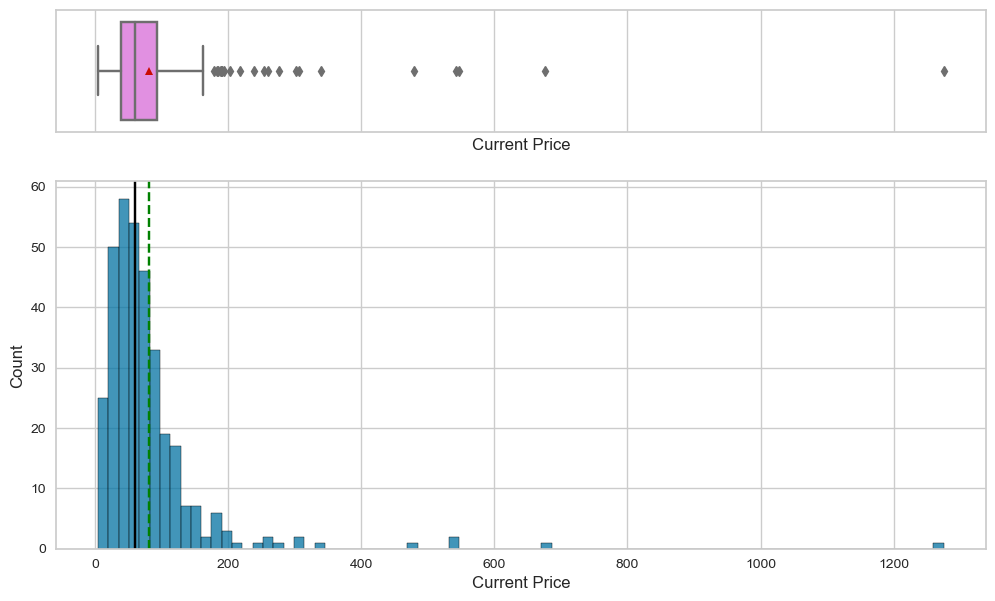

In [14]:
# What does the distribution of stock prices look like?

histogram_boxplot(df, 'Current Price')

- The current price is a right-skewed unimodal distribution that is roughly normal with a mean of 81 and a standard deviation of 98.

<Axes: xlabel='Price Change', ylabel='Sector'>

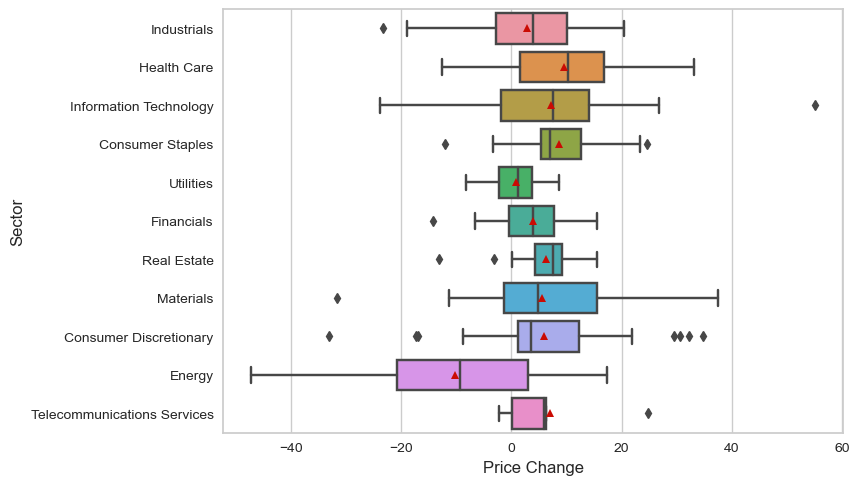

In [15]:
# The stocks of which economic sector have seen the maximum price increase on average?

sns.boxplot(df,x='Price Change', y='Sector', showmeans=True)


- The Health Care industry has had the greatest average price increase during the previous 13 weeks.
- Consumer Staples was second, and 
- Energy was lowest with a negative average price change.

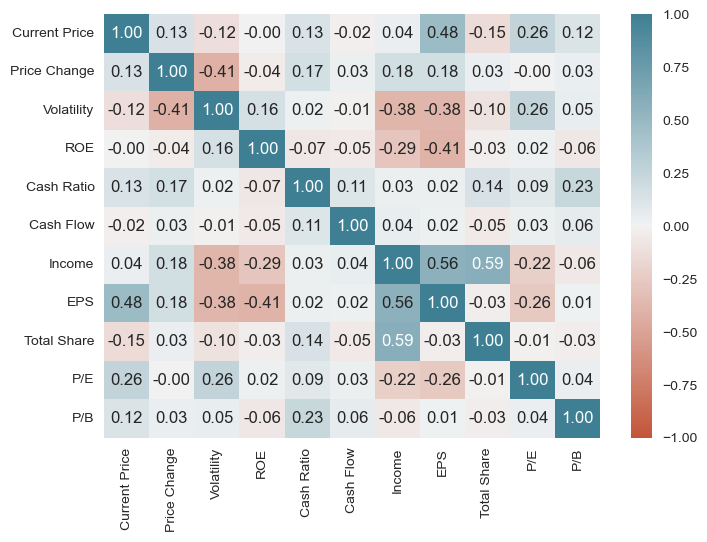

In [16]:
# How are the different variables correlated with each other?

sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1, 
            vmax=1, 
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, 
            fmt='.2f')
plt.show()

- All correlations are weak.
- The strongest positive correlation is between Income and Total Shares with a correlation of 59%
- The strongest negative correlation is between Volatility and Price Change and also ROE and EPS, both with a correlation of 41%.

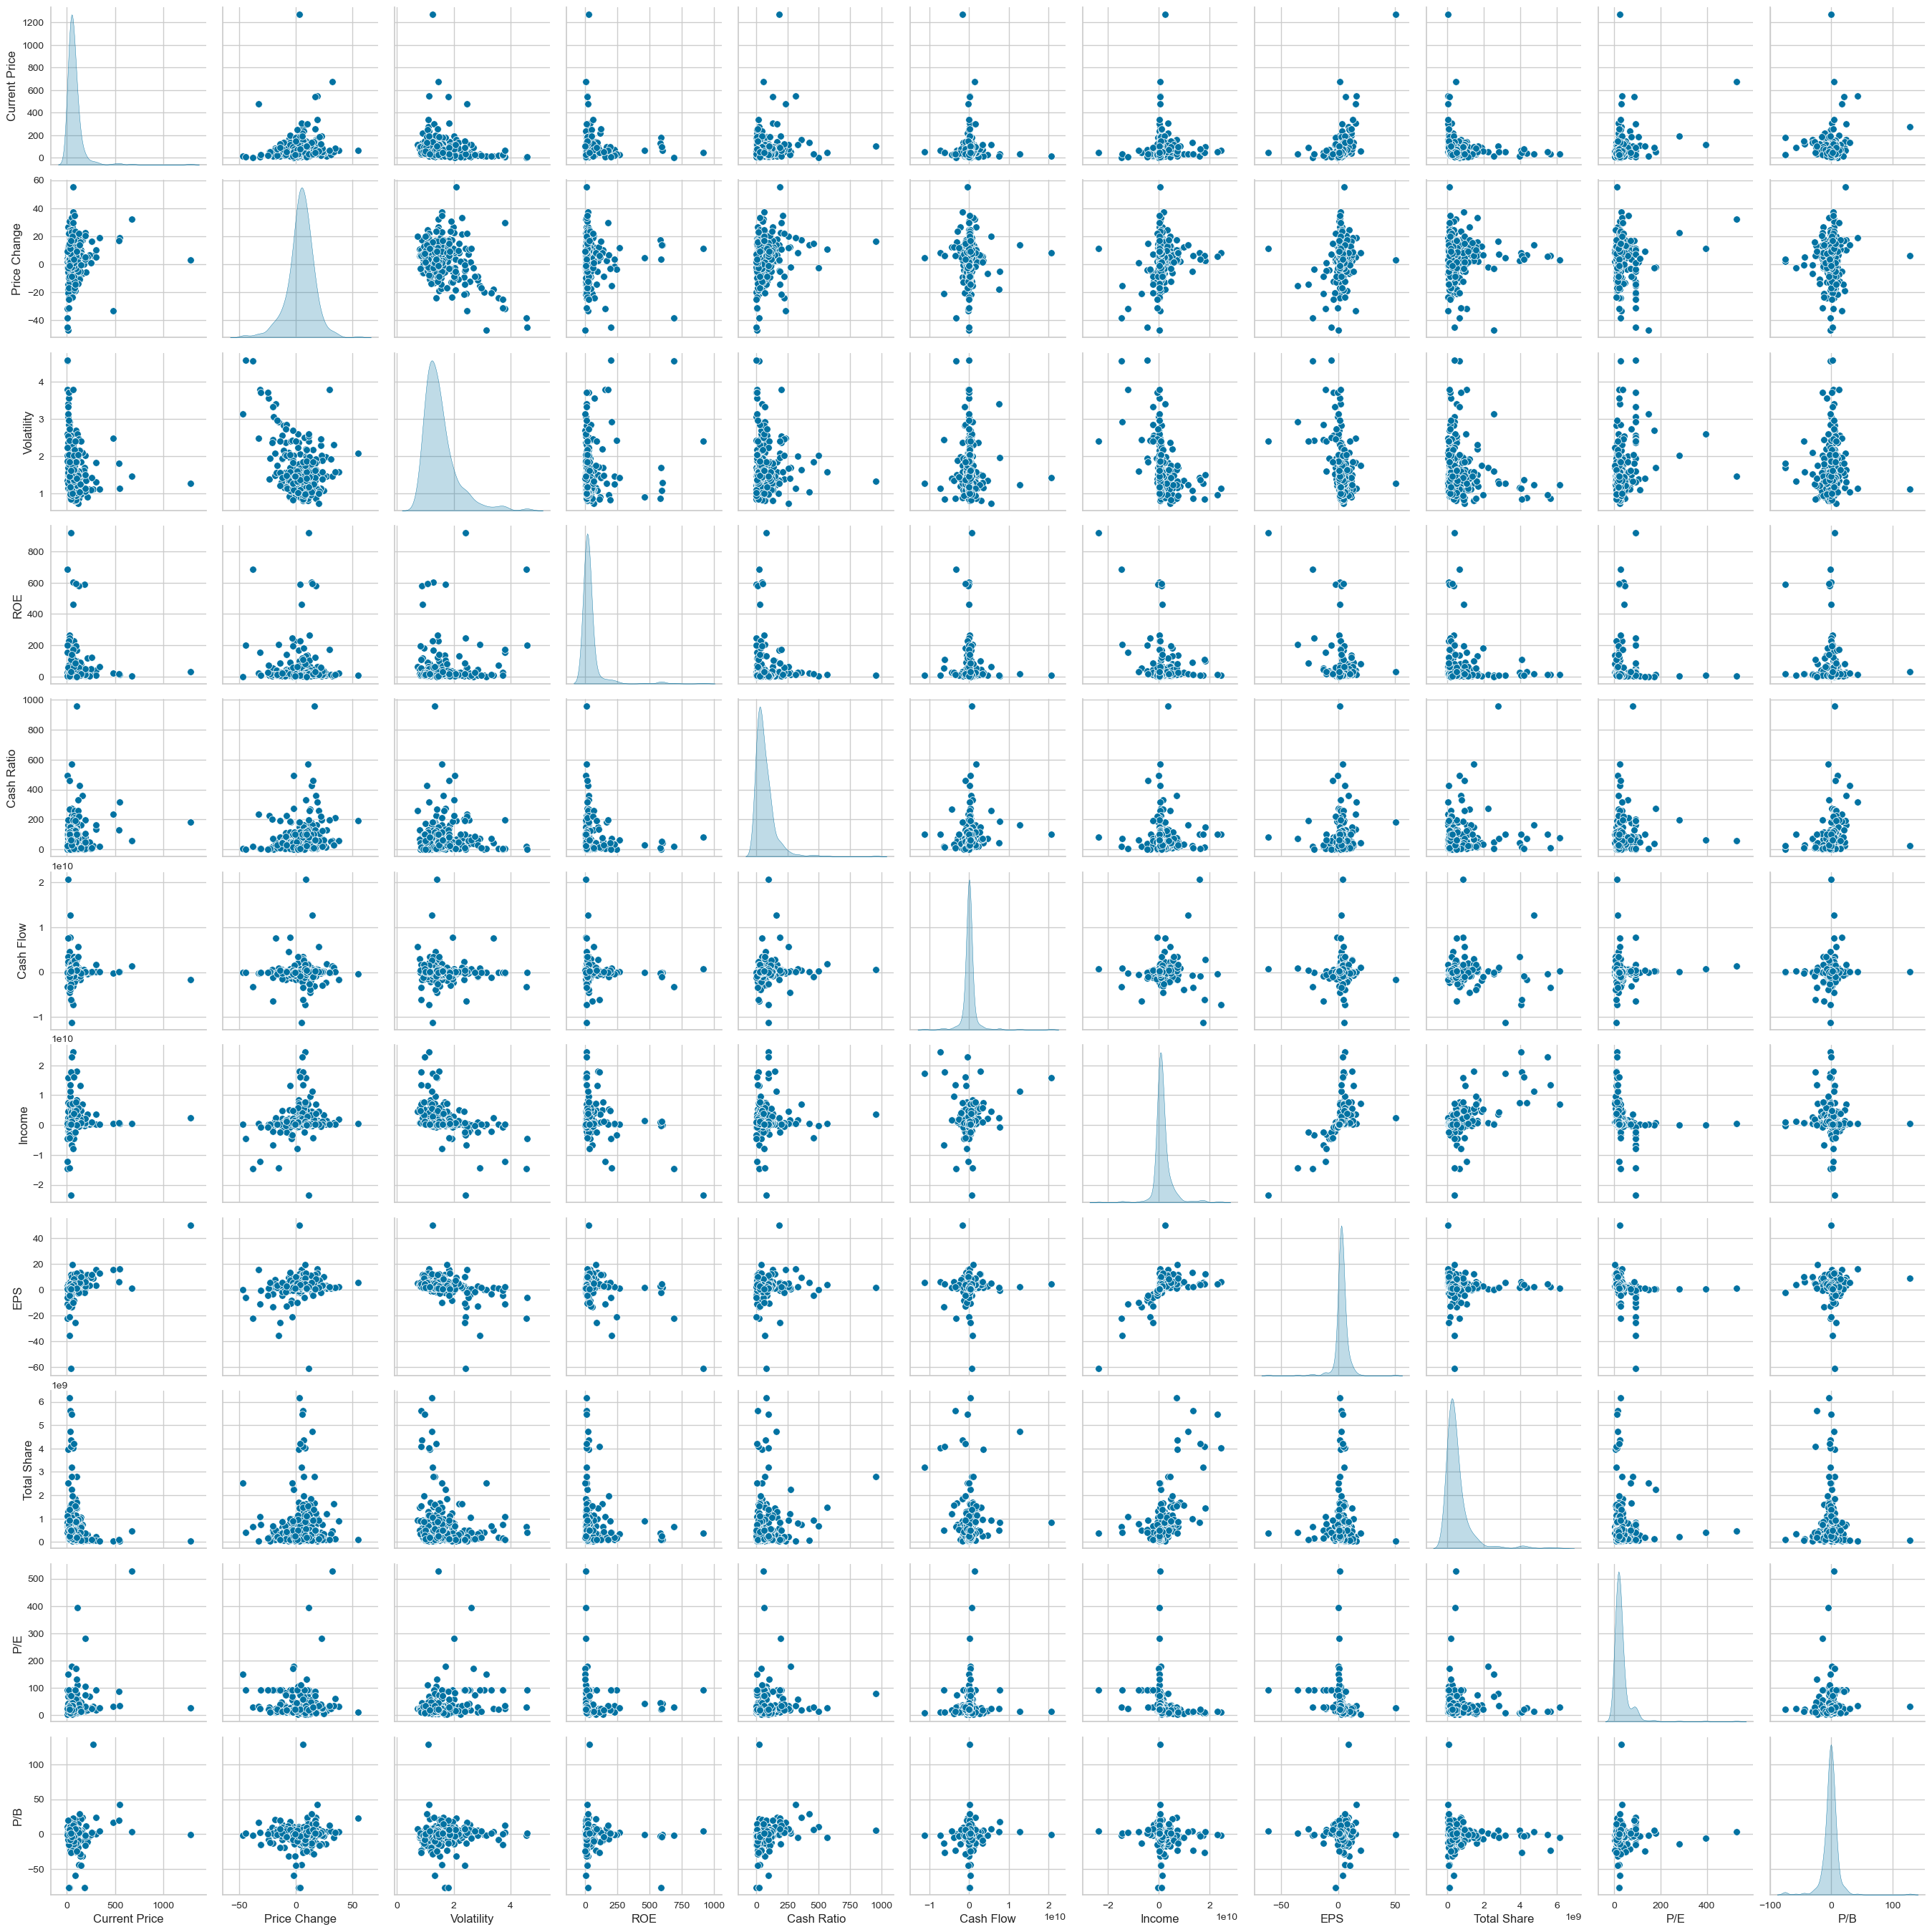

In [17]:
sns.pairplot(df, diag_kind='kde')
plt.show()

- Pairplot shows very little correlation of ver all of the variables.
- All variables appear to be roughly normally distributed.

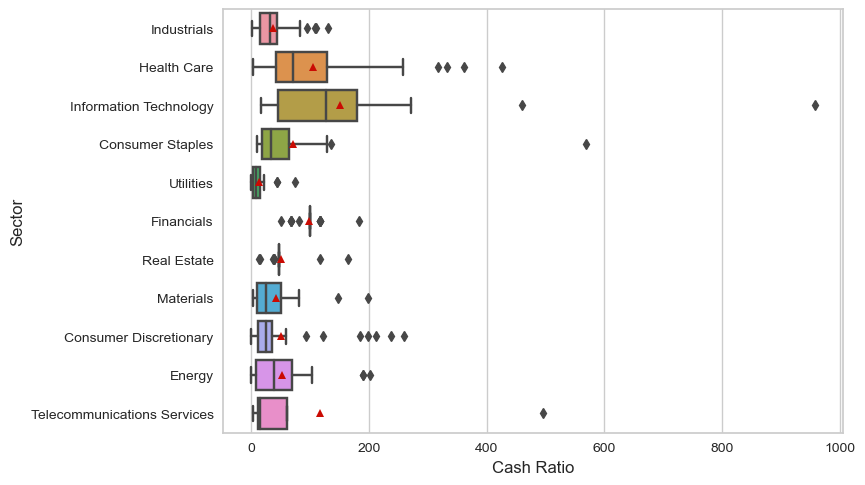

In [18]:
# Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents.
# How does the average cash ratio vary across economic sectors?

sns.boxplot(df,x='Cash Ratio', y='Sector', showmeans=True)
plt.show()

- IT sector has the highest average Cash Ratio
- The Utilities sector has the lowest average Cash Ratio.

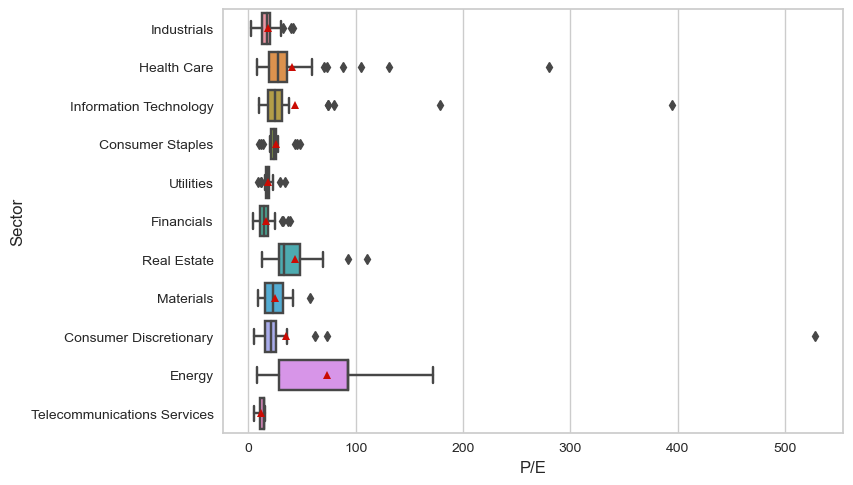

In [19]:
''' P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is 
 willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across 
 economic sectors? '''

sns.boxplot(df,x='P/E', y='Sector', showmeans=True)
plt.show()

- Energy has the highest average P/E ratio.
- Telecomm has the lowest average P/E ratio.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [20]:
# Duplicate value check
df.duplicated().sum()

0

- There are no duplicate values

In [21]:
# Missing value treatment
df.isna().sum()

Symbol           0
Security         0
Sector           0
Sub Ind          0
Current Price    0
Price Change     0
Volatility       0
ROE              0
Cash Ratio       0
Cash Flow        0
Income           0
EPS              0
Total Share      0
P/E              0
P/B              0
dtype: int64

In [22]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(num_cols)

['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Cash Flow', 'Income', 'EPS', 'Total Share', 'P/E', 'P/B']


- There are no missing values

Outlier check (treatment if needed)
- Perform analysis with and without outliers. Check for differences.
- Are segments created by outliers significant or useful in any way?
- Consider different distance measures, such as Manhattan distance, to minimize effect of outliers.

In [23]:
# Feature scaling

sc = StandardScaler()
subset = df[num_cols].copy()
subset_sc = sc.fit_transform(subset)

In [24]:
subset_sc_df = pd.DataFrame(subset_sc, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

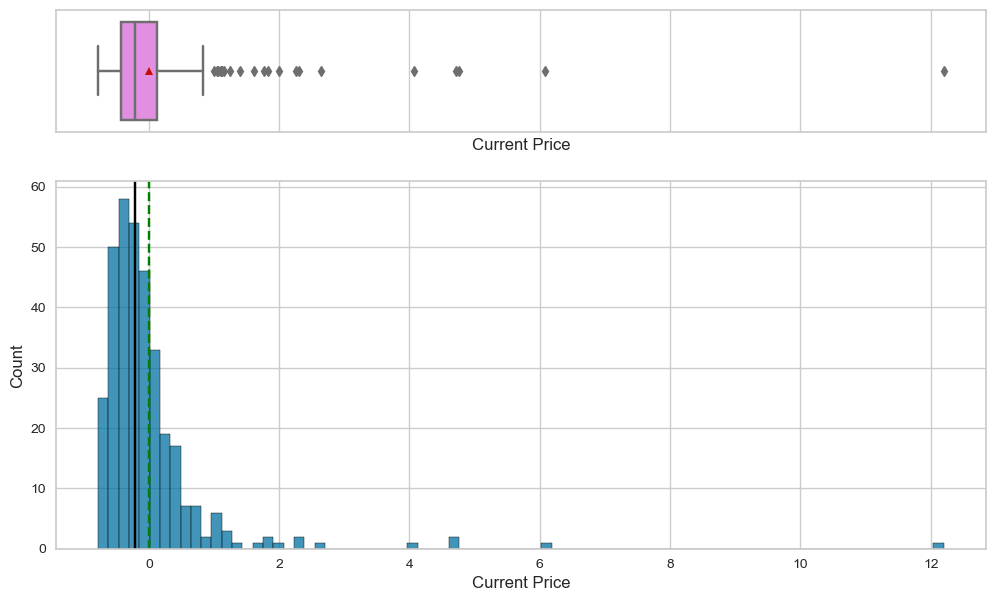

In [25]:
# Univariate analysis

histogram_boxplot(subset_sc_df, 'Current Price')

- Looks like we have at lest two observations with current prices that are at least 5 standard deviations from the mean.

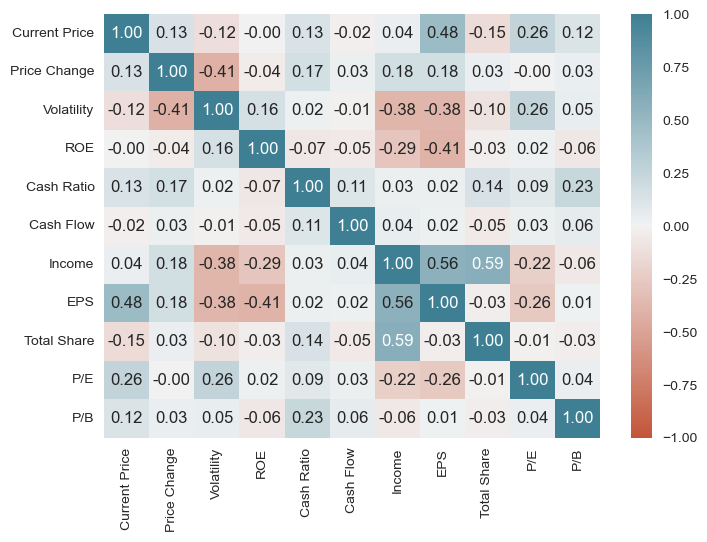

In [26]:
# Bivariate analysis

sns.heatmap(subset_sc_df.corr(), 
            vmin=-1, 
            vmax=1, 
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, 
            fmt='.2f')
plt.show()

- Correlations are not surprisingly the same after scaling.

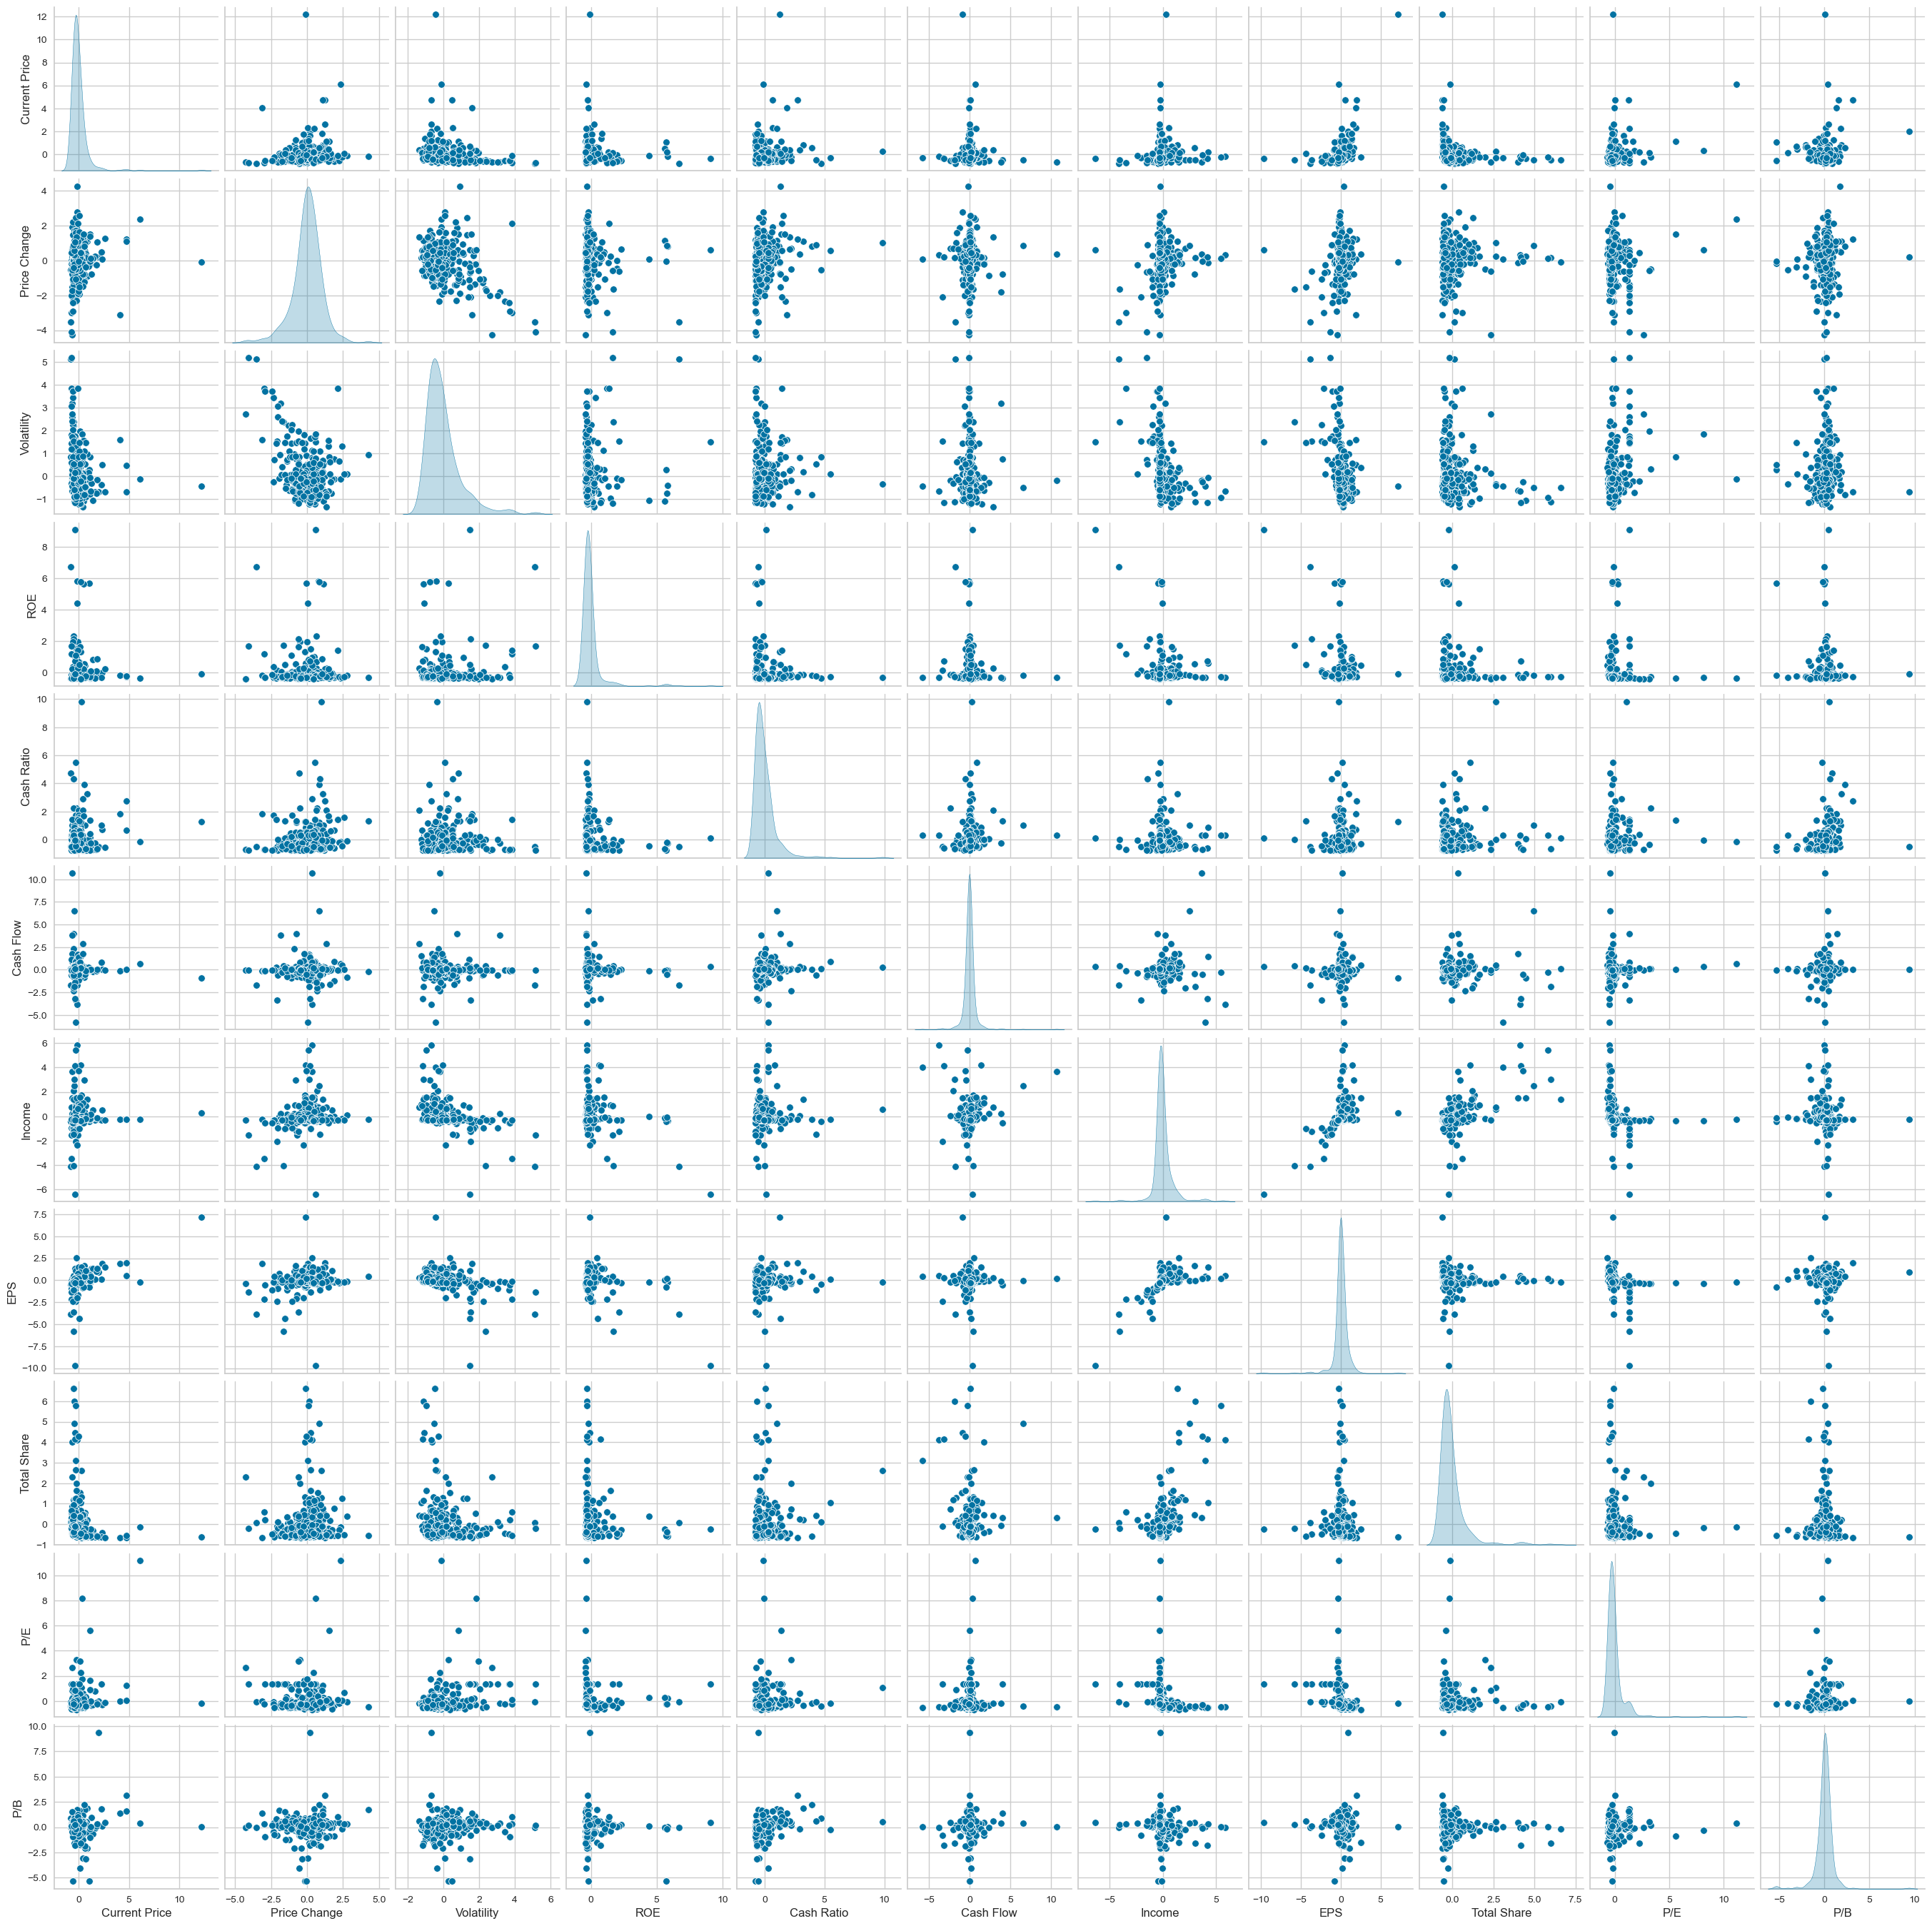

In [27]:
sns.pairplot(subset_sc_df, diag_kind='kde')
plt.show()

- Every thing seems to be scaled correctly.

In [28]:
# Insights based on EDA

## K-means Clustering

In [29]:
# Apply K-means Clustering

clusters = range(2,23)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k,n_init=10)
    model.fit(subset_sc_df)
    prediction = model.predict(subset_sc_df)
    distortion = (sum(np.min(cdist(subset_sc_df, model.cluster_centers_, "euclidean"), axis=1))/subset_sc_df.shape[0]    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.267596864267437
Number of Clusters: 4 	Average Distortion: 2.183799813315812
Number of Clusters: 5 	Average Distortion: 2.122401011472436
Number of Clusters: 6 	Average Distortion: 2.0787280164180695
Number of Clusters: 7 	Average Distortion: 2.018463656332171
Number of Clusters: 8 	Average Distortion: 1.962985208935381
Number of Clusters: 9 	Average Distortion: 1.9314210288795768
Number of Clusters: 10 	Average Distortion: 1.8750038314896436
Number of Clusters: 11 	Average Distortion: 1.7956076715694769
Number of Clusters: 12 	Average Distortion: 1.777741853447719
Number of Clusters: 13 	Average Distortion: 1.7373554151342614
Number of Clusters: 14 	Average Distortion: 1.6747916486031713
Number of Clusters: 15 	Average Distortion: 1.6564538864172036
Number of Clusters: 16 	Average Distortion: 1.6127195408428656
Number of Clusters: 17 	Average Distortion: 1.57430680723421
Number of

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

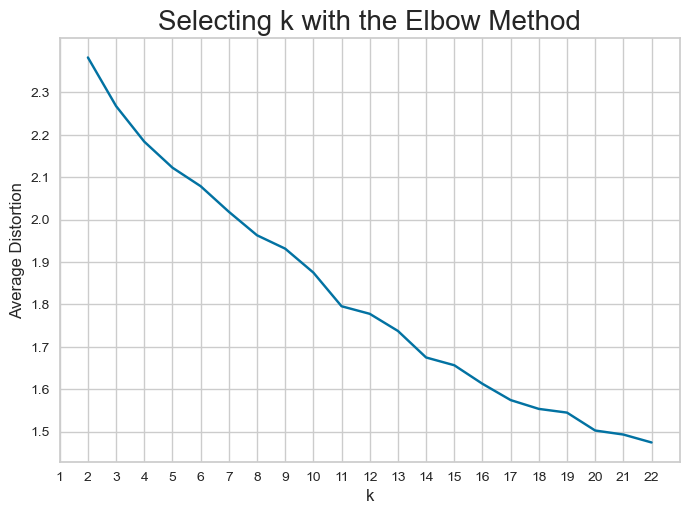

In [30]:
# Plot the Elbow curve

plt.xticks(np.arange(0,23,1))
plt.yticks(np.arange(0,2.4,0.1))
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- There is no clear elbow.

In [31]:
# Check Silhouette Scores

sil_score = []
cluster_list = list(range(2, 23))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10)
    preds = clusterer.fit_predict((subset_sc_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_sc_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45755884975007327
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.40999356683171667
For n_clusters = 6, silhouette score is 0.35953816980755665
For n_clusters = 7, silhouette score is 0.3970537179835474
For n_clusters = 8, silhouette score is 0.390113778407706
For n_clusters = 9, silhouette score is 0.1578849975629899
For n_clusters = 10, silhouette score is 0.18011528994705786
For n_clusters = 11, silhouette score is 0.12780884478922944
For n_clusters = 12, silhouette score is 0.11732563050553482
For n_clusters = 13, silhouette score is 0.16249056357583447
For n_clusters = 14, silhouette score is 0.1670751418633274
For n_clusters = 15, silhouette score is 0.1520913198641292
For n_clusters = 16, silhouette score is 0.1604814414904721
For n_clusters = 17, silhouette score is 0.1349553006416801
For n_clusters = 18, silhouette score is

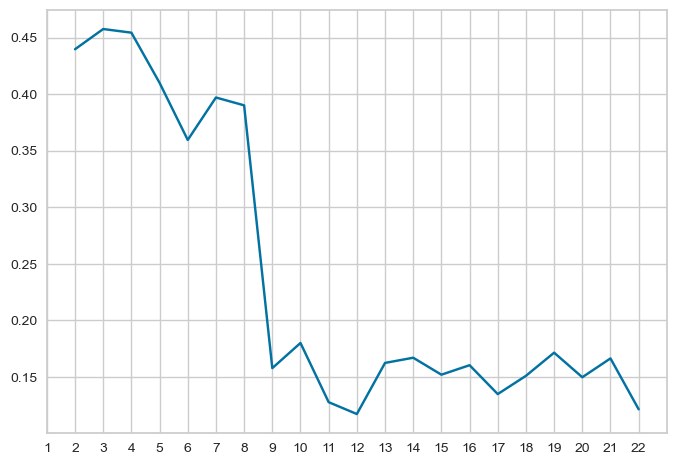

In [32]:
plt.xticks(np.arange(0,23,1))
plt.plot(cluster_list, sil_score)

- This indicates that 4 clusters gives the best clustering.
- However, with a Silhouette score of  about 0.46, it's not great.

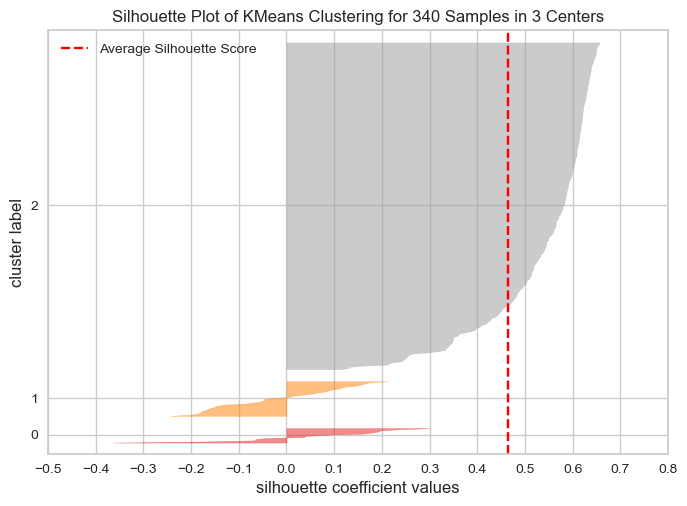

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1,n_init=10))
visualizer.fit(subset_sc_df)
visualizer.show()

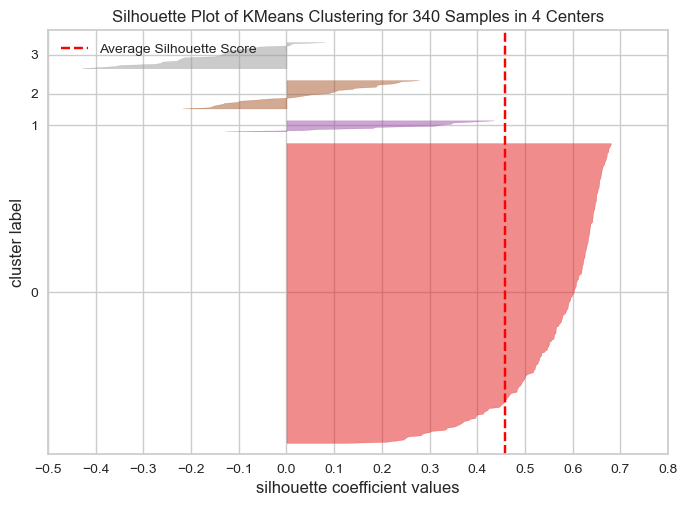

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1,n_init=10))
visualizer.fit(subset_sc_df)
visualizer.show()

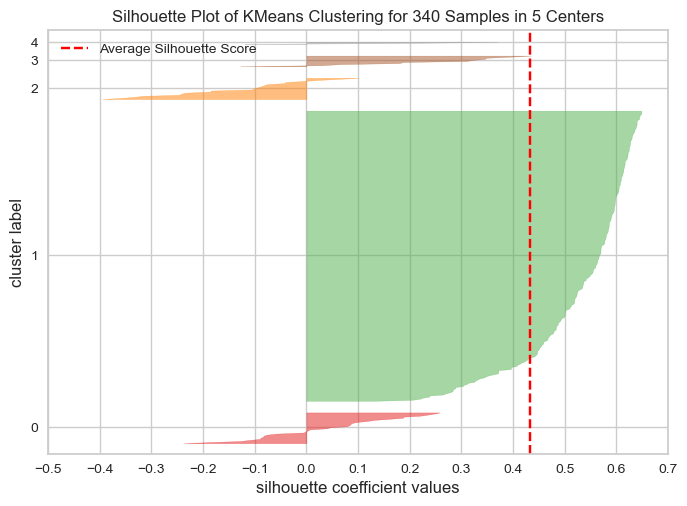

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1,n_init=10))
visualizer.fit(subset_sc_df)
visualizer.show()

- None of these look all that great. They all have quite a few values with negative Silhouette coefficient values.
- I will stick with the number of clusters that give the best Silhouette score, 4 clusters.

Cluster Profiling
- Group data based on the clusters formed
- Check summary statistics of the variables for each group
- Visualize variable distributions for each group
- Insights

In [36]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(subset_sc_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [37]:
df1 = df.copy()

In [38]:
df1['K-means Segments'] = kmeans.labels_

In [39]:
cluster_prof = df1.groupby('K-means Segments').mean(numeric_only=True)

In [40]:
cluster_prof['count_in_each_segment'] = (df1.groupby("K-means Segments")["Symbol"].count().values)

In [41]:
cluster_prof.style.highlight_max(color='lightgreen', axis=0)

- Cluster 0 has the highest average Current Price of $234.17.
- Cluster 0 also has the highest average percent price change with 13.40% increase.
- Cluster 0 also has the greatest Cash Ratio, Cash Flow, EPS and P/B Ratio. 
- Cluster 1 has the greatest Volatility, ROE, and P/E Ratio
- Cluster 2 has the highest average Income and Total Shares.
- Cluster 3 is the most represented cluster.

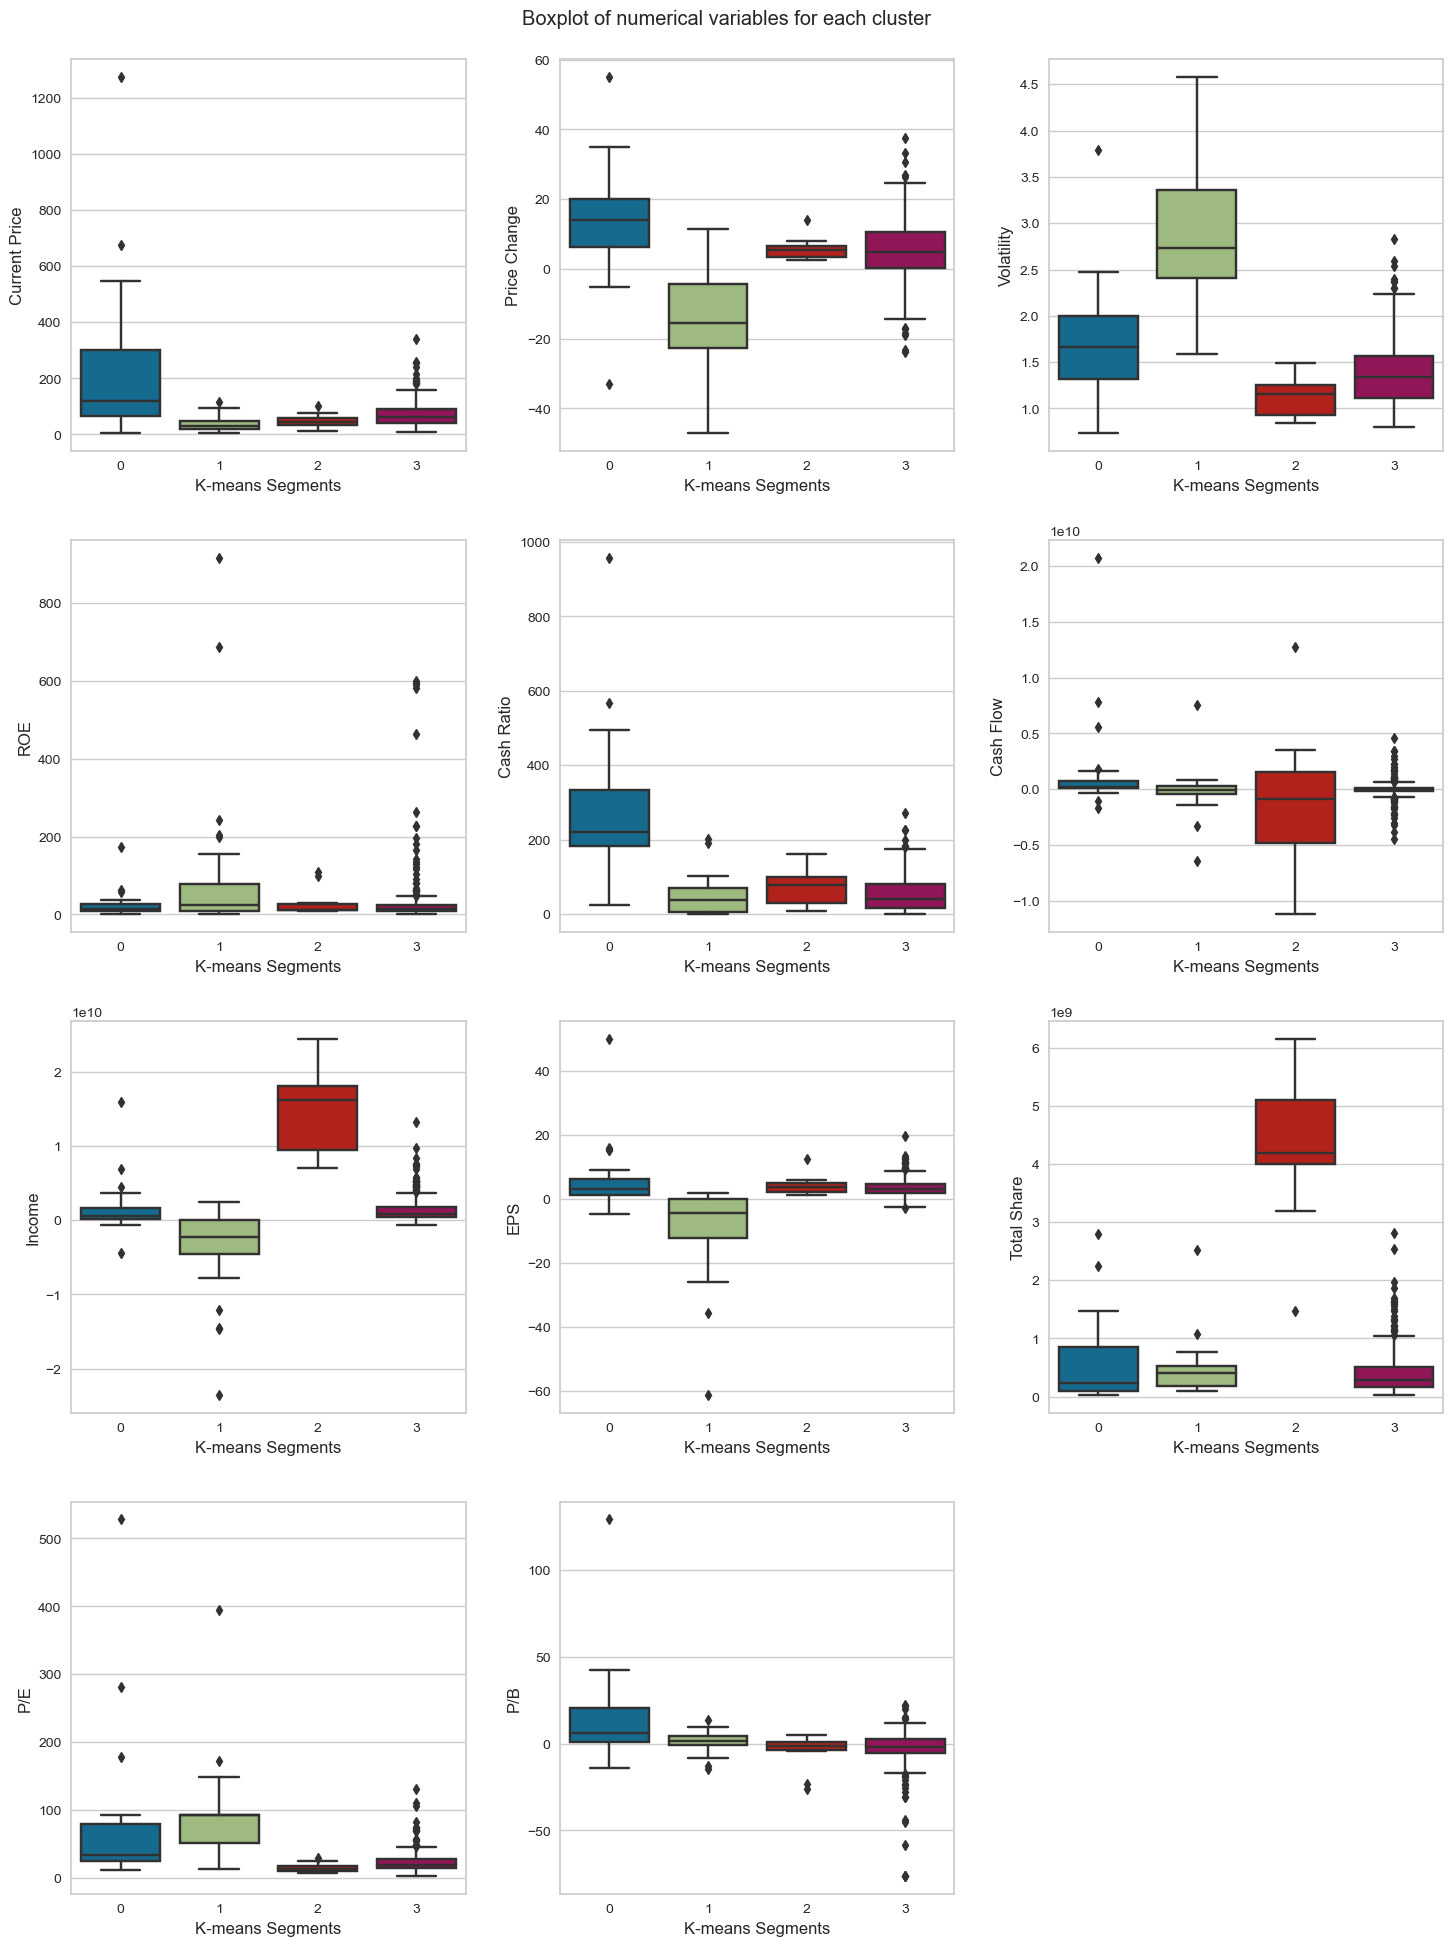

In [42]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x="K-means Segments", y=variable)

plt.tight_layout(pad=2.0)

In [43]:
# let's see the names of the securities in all but cluster 3.

for i in [0,1,2]:
    print("In cluster {}, the following securities are present:".format(i))
    print(df1[df1["K-means Segments"] == i]["Security"].unique())
    print()

In cluster 0, the following securities are present:
['Analog Devices, Inc.' 'Alliance Data Systems' 'Alexion Pharmaceuticals'
 'Amgen Inc' 'Amazon.com Inc' 'Bank of America Corp' 'BIOGEN IDEC Inc.'
 'Celgene Corp.' 'Chipotle Mexican Grill' 'Equinix' 'Edwards Lifesciences'
 'Facebook' 'First Solar Inc' 'Frontier Communications' 'Halliburton Co.'
 'Intuitive Surgical Inc.' "McDonald's Corp." 'Monster Beverage'
 'Priceline.com Inc' 'Regeneron' 'TripAdvisor'
 'Vertex Pharmaceuticals Inc' 'Waters Corporation' 'Wynn Resorts Ltd'
 'Yahoo Inc.']

In cluster 1, the following securities are present:
['Apache Corporation' 'Anadarko Petroleum Corp' 'Baker Hughes Inc'
 'Chesapeake Energy' 'Cabot Oil & Gas' 'Concho Resources'
 'Devon Energy Corp.' 'EOG Resources' 'EQT Corporation'
 'Freeport-McMoran Cp & Gld' 'Hess Corporation'
 'Hewlett Packard Enterprise' 'Kinder Morgan' 'Marathon Oil Corp.'
 'Murphy Oil' 'Noble Energy Inc' 'Netflix Inc.' 'Newfield Exploration Co'
 'National Oilwell Varco Inc.' 'O

<Axes: xlabel='K-means Segments'>

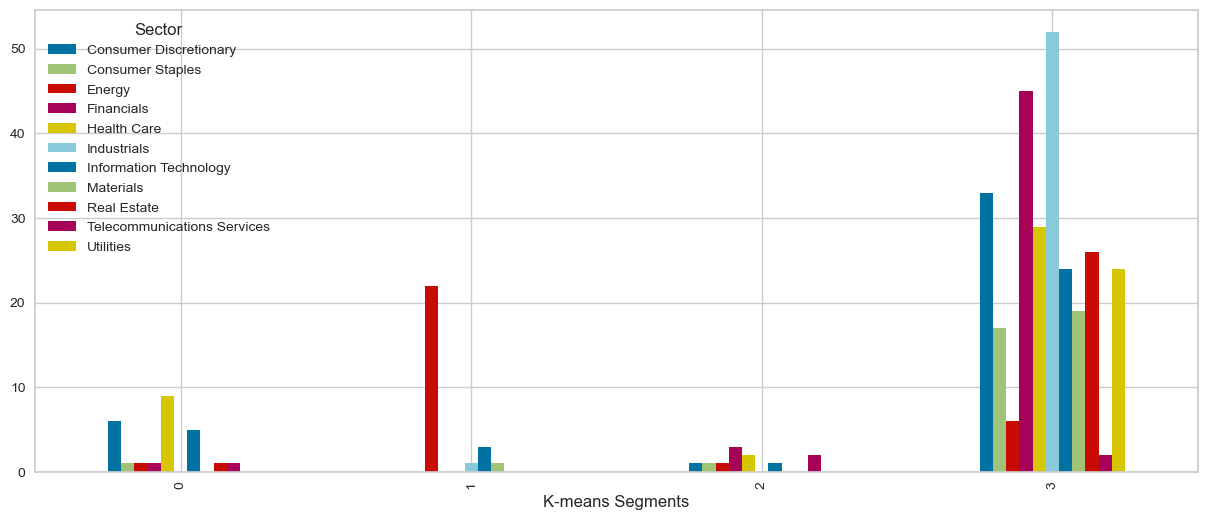

In [44]:
df1.groupby("K-means Segments")["Sector"].value_counts().unstack().plot.bar(figsize=(15, 6))

- Industrials are almost entiely in cluster 3
- Cluster 1 is dominated by Energy
- Almost all Financials are in cluster 3
- Materials are almost all in Cluster 3
- Real Estate is almost all in Cluster 3
- Utilities are almost all in Cluster 3

#### Overall Insights after K-Means Clustering
- If I were to invest in stock in one particular cluster I would choose Cluster 0. 
- Cluster 0 has the highest values in several good indicators such as Price Change, Cash Ratio, Cash Flow, Earnings Per Share, and P/B Ratio. 
- It also has middle-of-the-road volatility indicating safe and predictable investments.
- It has middle-of-the-road P/E Ratios indicating that shares are not overpriced for their value. 
- Cluster 0 has decent portfolio diversity covering 8 industries although not a whole lot of individual securities like cluster 3. 

## Hierarchical Clustering

In [45]:
# copy of data for HC

df2 = df.copy()

In [46]:
# Check cophenetic correlation for each linkage method

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_sc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_sc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524588.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlatio

In [47]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [48]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_sc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_sc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [49]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


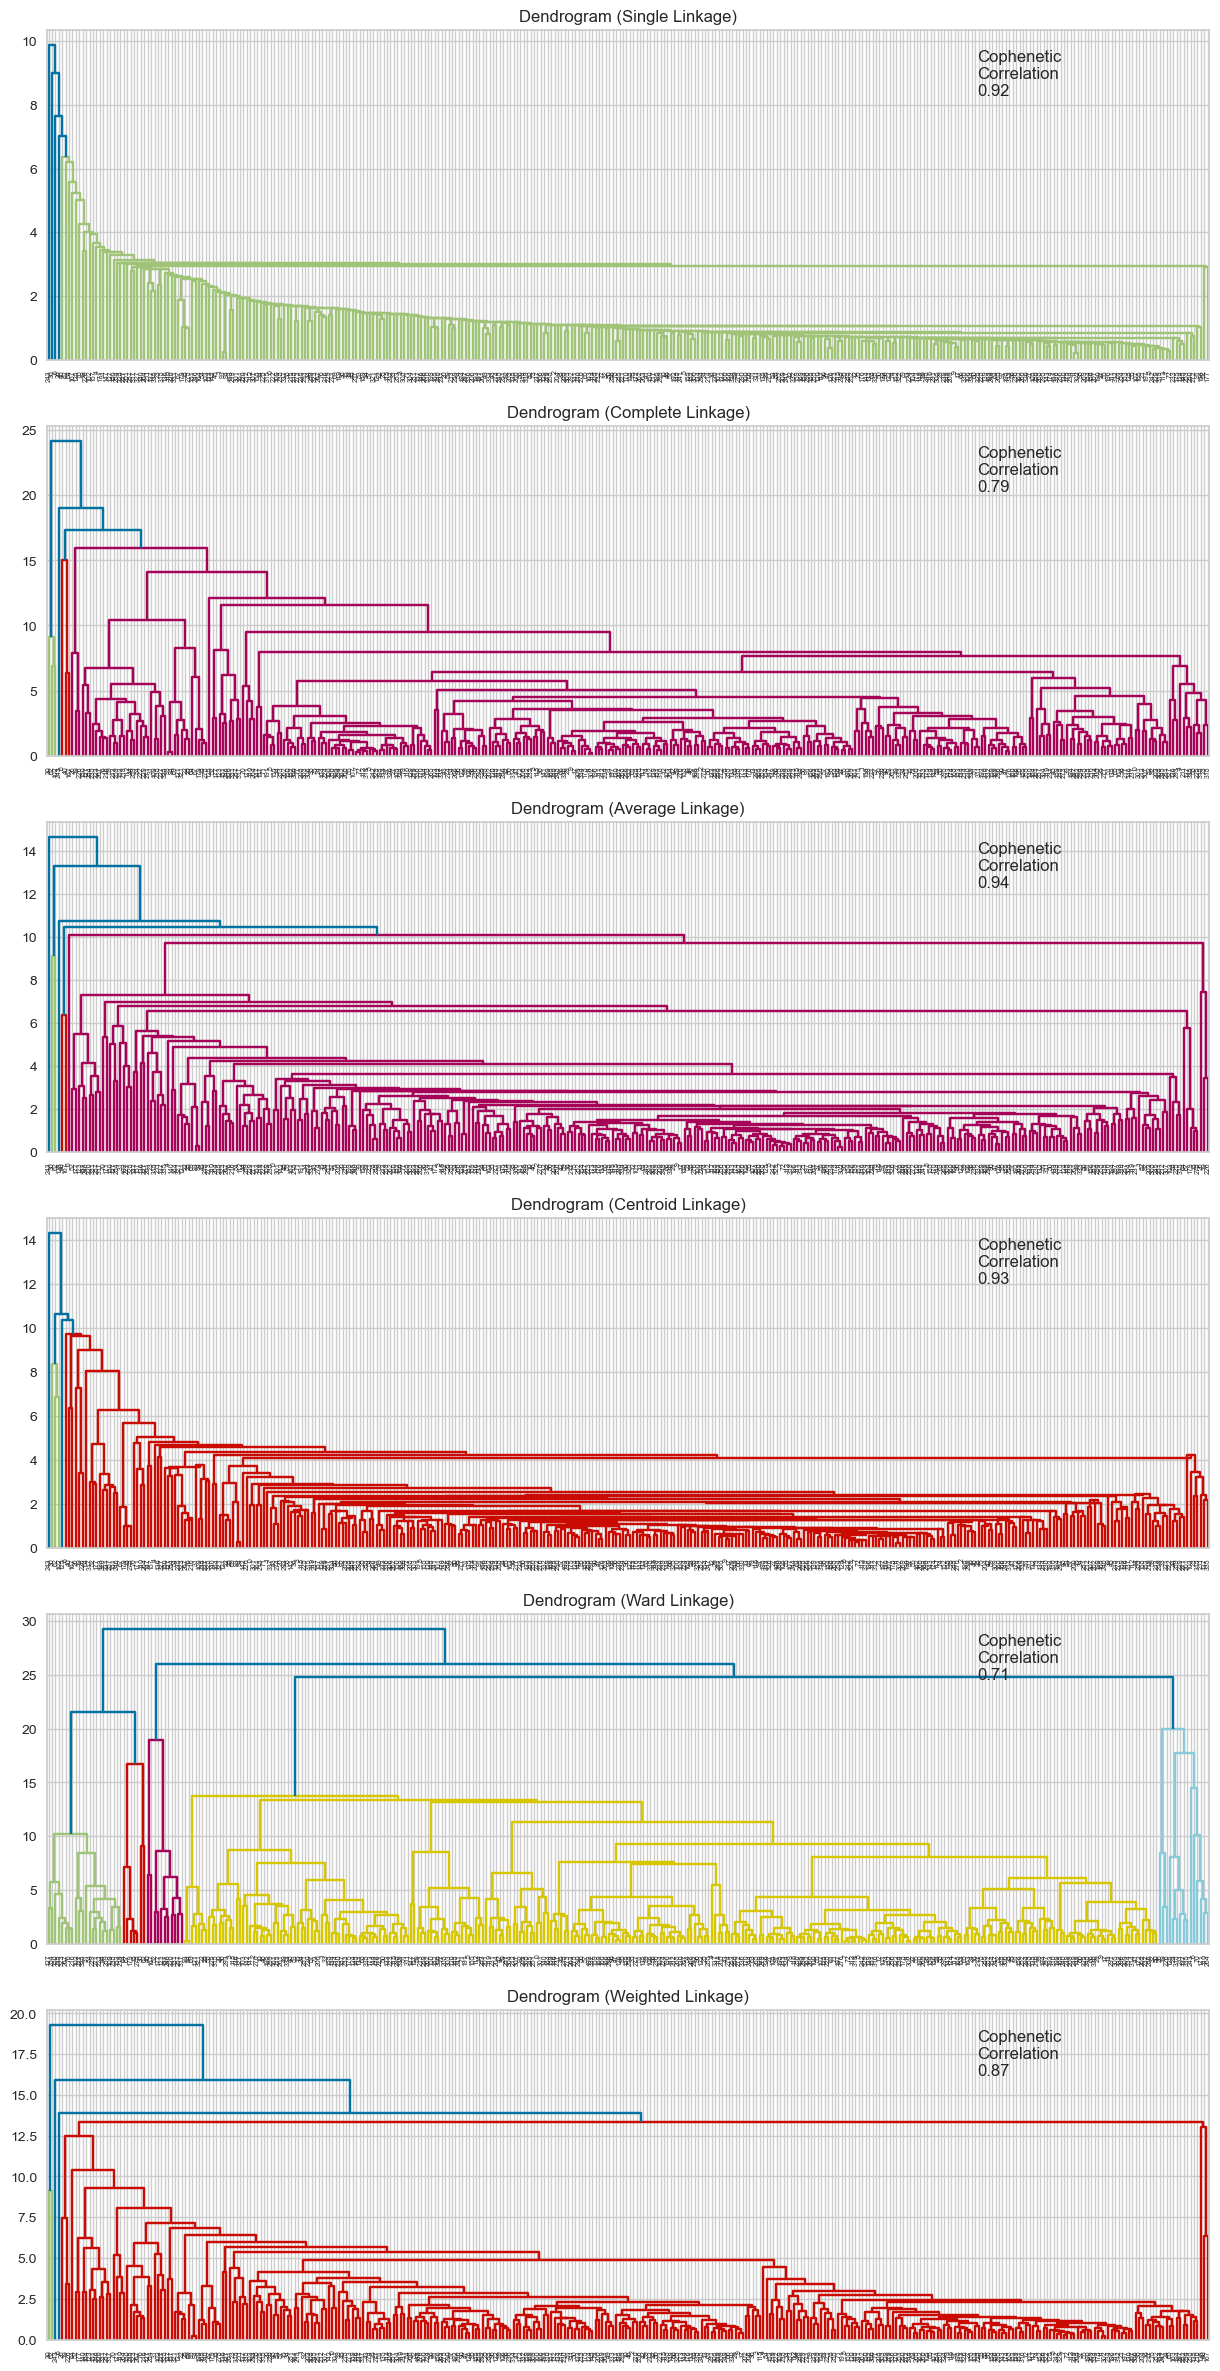

In [50]:
# Plot dendrograms for each linkage method

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_sc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_sc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- Average Linkage gives the highest Cophenetic Correlation at 94%
- I would go with 5 clusters even though that is sending most observations into one cluster.

- Inspite of it's low Cophenetic Correlation, I am going to choose Ward Linkage as it seems to be creating more diversified clusters when the number of clusters is small (around 5 clusters). 
- All other linkages are basically sending most observations into one cluster,

#### Figure out appropriate number of clusters

I am going to try out both Ward and Average linkages with 5 clusters.

In [51]:
# Average Linkages

HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="average")
HCmodel.fit(subset_sc_df)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=5)

In [52]:
subset_sc_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [53]:
df2.head()

Symbol                 Security                  Sector  \
0    AAL  American Airlines Group             Industrials   
1   ABBV                   AbbVie             Health Care   
2    ABT      Abbott Laboratories             Health Care   
3   ADBE        Adobe Systems Inc  Information Technology   
4    ADI     Analog Devices, Inc.  Information Technology   

                 Sub Ind  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Cash Flow      Income    EPS   Total Share         P/E  \
0          51 -604000000  7610000000  11.39  6.681299e+08    3.718174   
1          77   51000000  5144000000   3.15  1.633016e+09   18.806350   
2          67  938000000  4423000000   2.94  1.504422e+09   15.275510   
3         180 -240840000   629551000   1.26  4.996437e+08   74.555557   
4         272  315120000   696878000   0.31  2.247994e+09  178.451613   

        P/B  HC_Clusters  
0 -8.784219            0  
1 -8.750068            0  
2 -0.394171            0  
3  4.199651            0  
4  1.059810            0

In [54]:
# Apply Hierarchical clustering with different linkage methods



Cluster Profiling
- Group data based on the clusters formed
- Check summary statistics of the variables for each group
- Visualize variable distributions for each group
- Insights

In [55]:
cluster_profile = df2.groupby("HC_Clusters").mean(numeric_only=True)

In [56]:
cluster_profile['count_in_each_segment'] = (df2.groupby("HC_Clusters")["Symbol"].count().values)

In [57]:
cluster_profile.style.highlight_max(color='lightgreen', axis=0)

- Cluster 4 has the highest average Current Price of $1274.95.
- Cluster 3 has the highest average percent price change with 16.22% increase.
- Cluster 0 is the most represented cluster.
- Clusters 1 and 2 both only have 2 securities each.
- Clusters 3 and 4 both have only 1 security each.

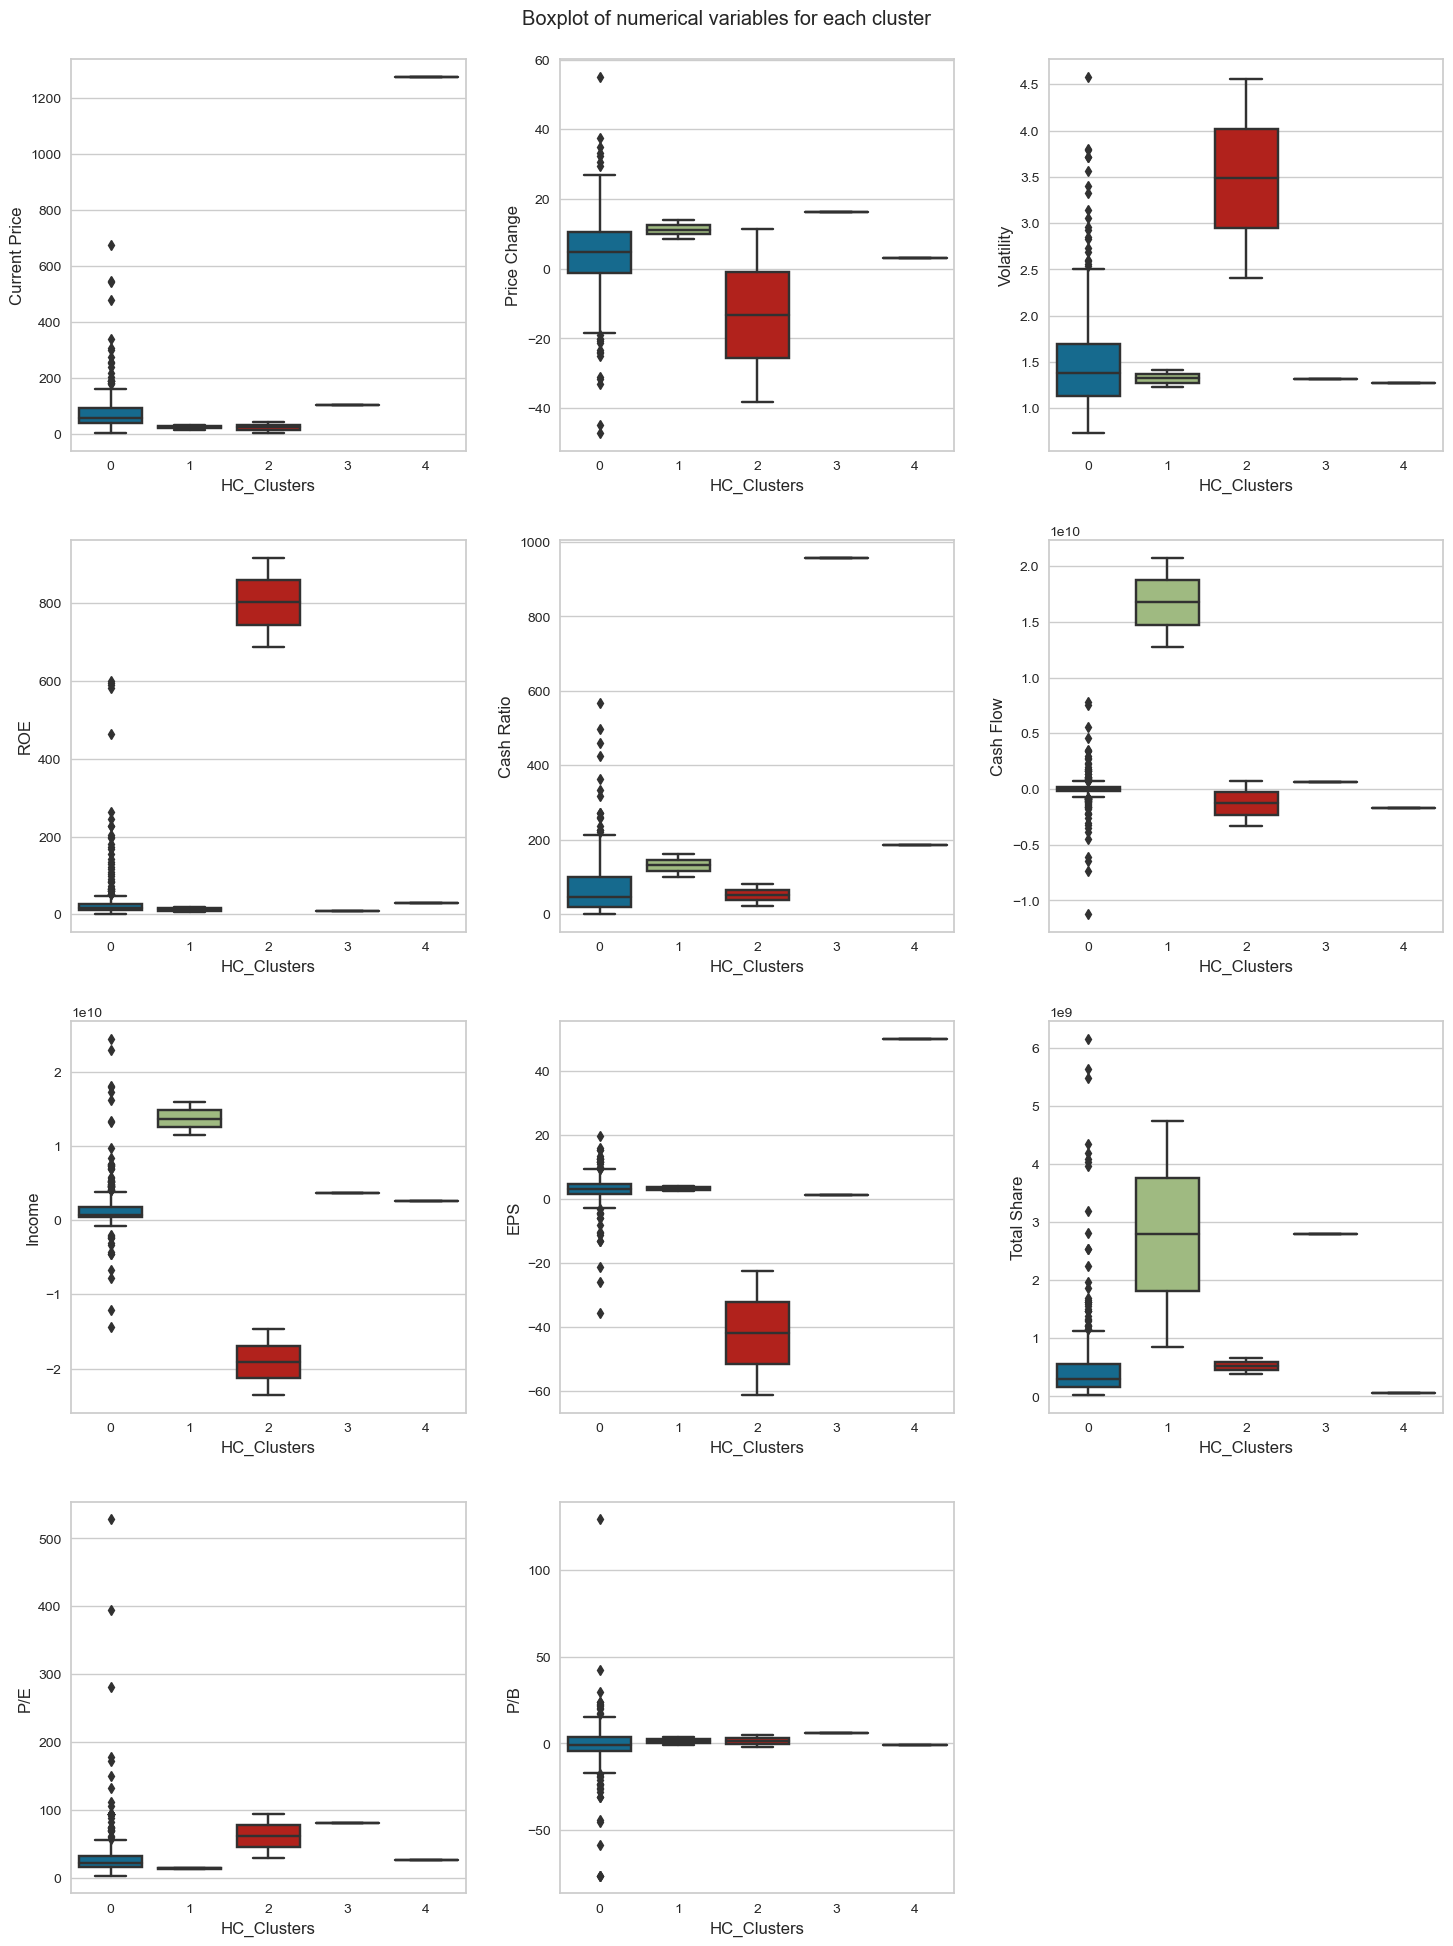

In [58]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [59]:
# let's see the names of the securities in cluster 1-4

for i in [1,2,3,4]:
    print("In cluster {}, the following securities are present:".format(i))
    print(df2[df2["HC_Clusters"] == i]["Security"].unique())
    print()

In cluster 1, the following securities are present:
['Bank of America Corp' 'Intel Corp.']

In cluster 2, the following securities are present:
['Apache Corporation' 'Chesapeake Energy']

In cluster 3, the following securities are present:
['Facebook']

In cluster 4, the following securities are present:
['Priceline.com Inc']



- Because basically everything is in Cluster 0 there really are not very many insights we can gain from this model.

## Removing Outliers

I am going to do the Hierarchical Clustering again, but this time I'm going to remove the following rows under the assumption that they are outliers:

- Bank of America Corp
- Intel Corp.
- Apache Corporation
- Chesapeake Energy
- Facebook
- Priceline.com Inc

In [60]:
# copy of data for HC

df3 = df.copy()

In [61]:
rows_to_remove = ['Bank of America Corp', 'Intel Corp.', 'Apache Corporation', 'Chesapeake Energy', 'Facebook', 'Priceline.com Inc']
mask = df3['Security'].isin(rows_to_remove)
df3 = df3[~mask]

In [62]:
df3.shape

(334, 15)

In [63]:
# Feature scaling

subset3 = df3[num_cols].copy()
subset3_sc = sc.fit_transform(subset3)

In [64]:
subset_sc_df3 = pd.DataFrame(subset3_sc, columns=subset3.columns)

In [65]:
# Check cophenetic correlation for each linkage method

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_sc_df3, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_sc_df3))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8981863517502324.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7953299326105824.
Cophenetic correlation for Euclidean distance and average linkage is 0.9342057249498519.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8537699461493863.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8730587124097606.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7674729785228022.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9153296268984192.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9037395689019374.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9022766619592927.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8049050624863497.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9040086635167421.
Cophenetic co

In [66]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9342057249498519, which is obtained with Euclidean distance and average linkage.


In [67]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_sc_df3, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_sc_df3))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8981863517502324.
Cophenetic correlation for complete linkage is 0.7953299326105824.
Cophenetic correlation for average linkage is 0.9342057249498519.
Cophenetic correlation for centroid linkage is 0.9281935980582594.
Cophenetic correlation for ward linkage is 0.7068433333480072.
Cophenetic correlation for weighted linkage is 0.8537699461493863.


In [68]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9342057249498519, which is obtained with average linkage.


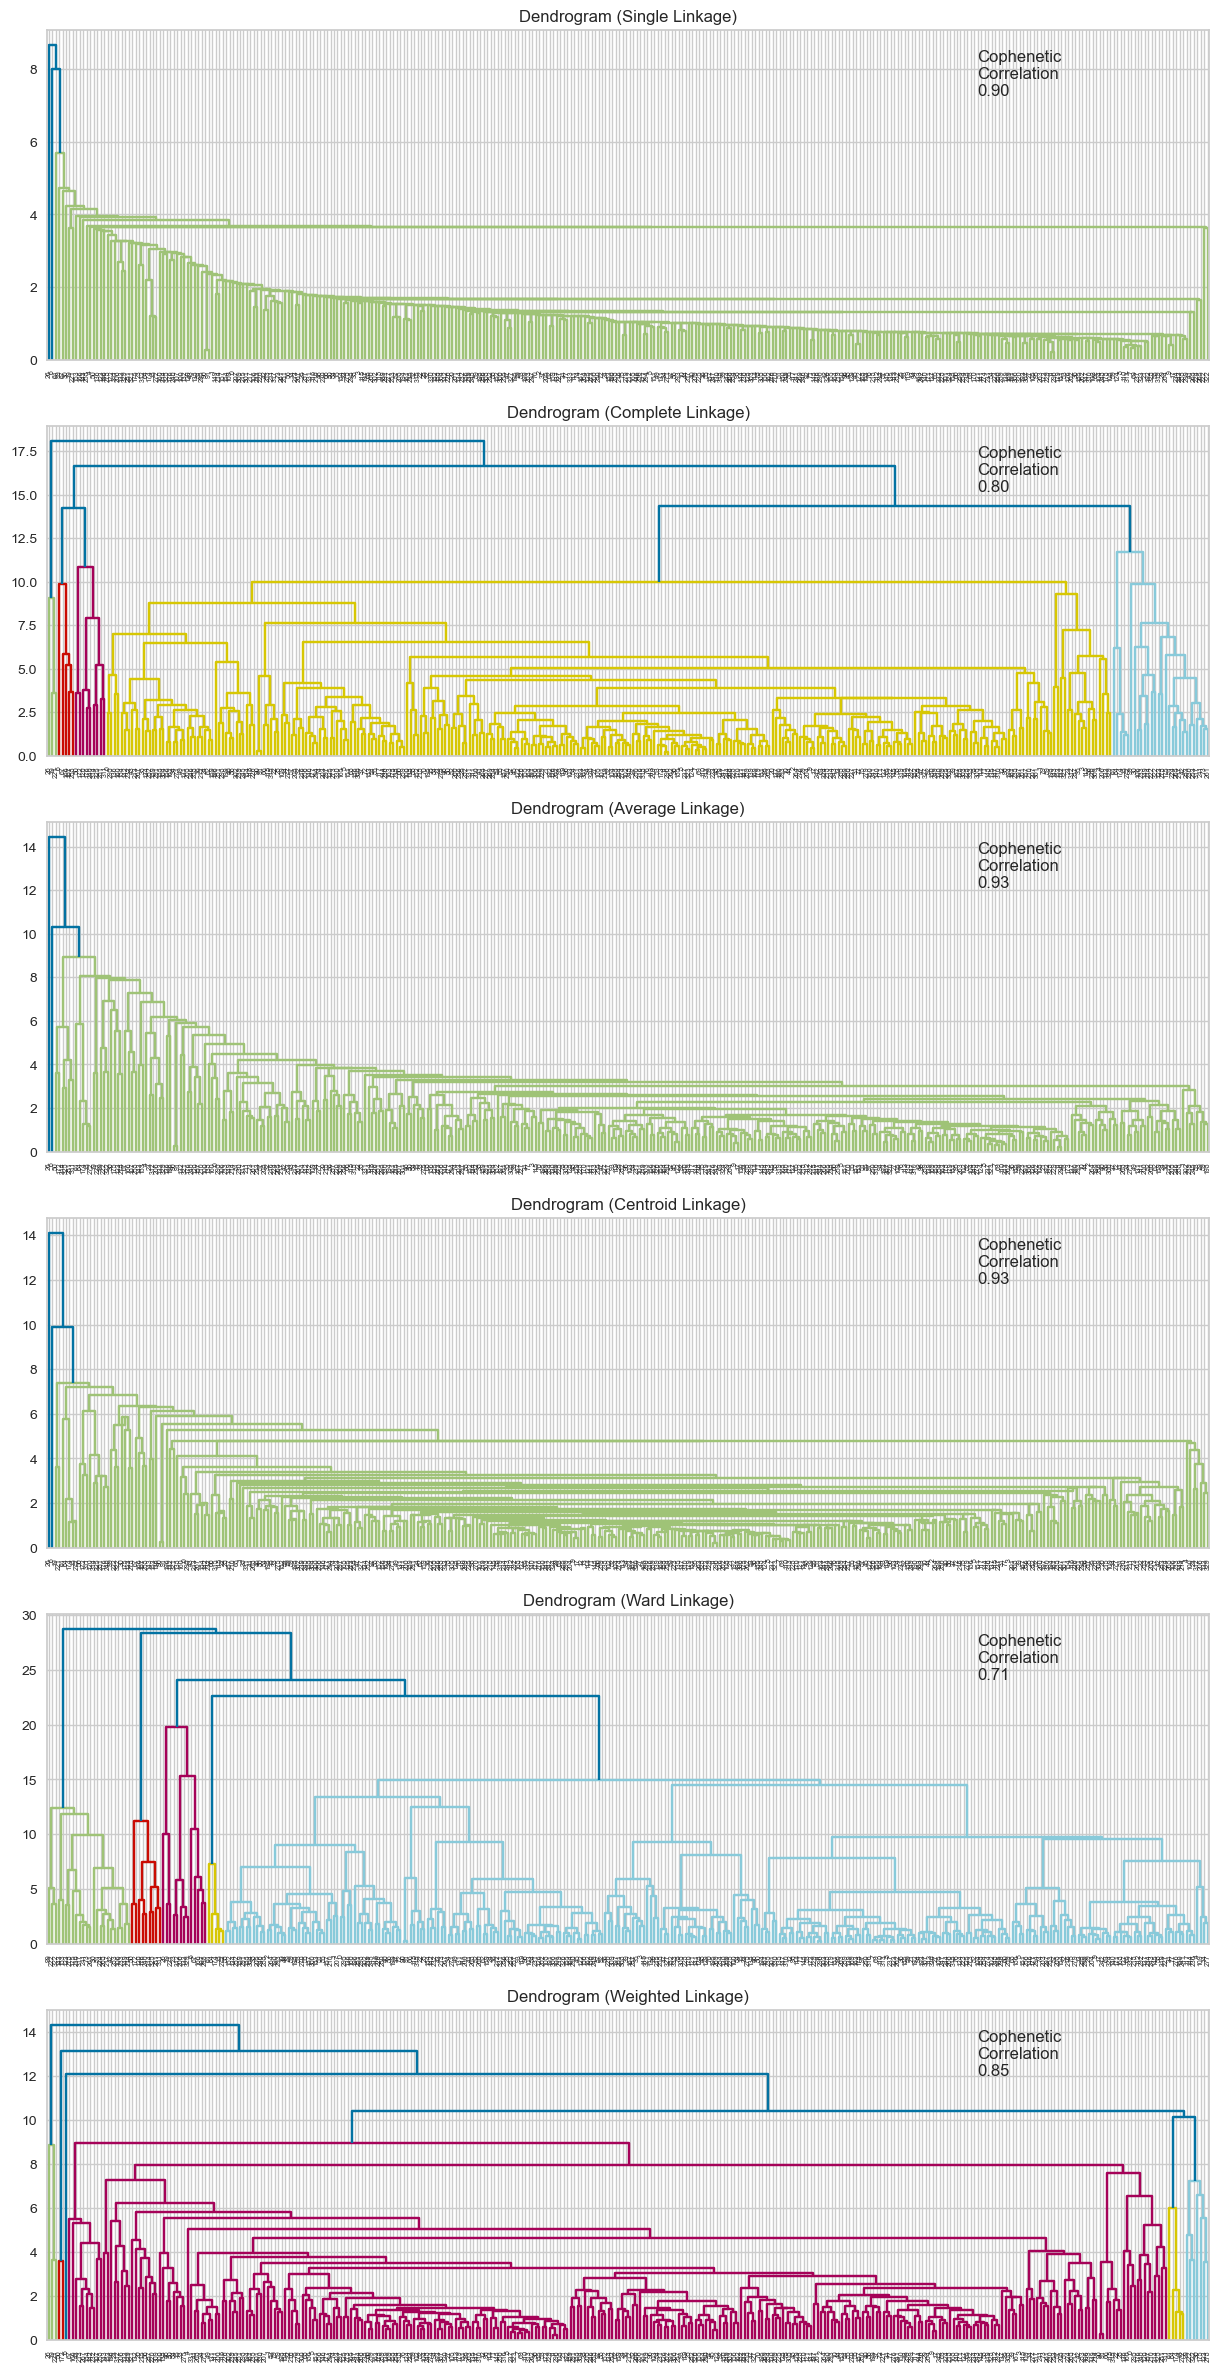

In [69]:
# Plot dendrograms for each linkage method

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_sc_df3, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_sc_df3))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- Average and Centroid Linkage gives the highest Cophenetic Correlation at 93%
- This is not an improvement after removing potential outliers.

#### Figure out appropriate number of clusters

I am going to try out average linkages with 7 clusters.

In [70]:
# Average Linkages

HCmodel = AgglomerativeClustering(n_clusters=7, metric="euclidean", linkage="average")
HCmodel.fit(subset_sc_df3)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=7)

In [71]:
subset_sc_df3["HC_Clusters"] = HCmodel.labels_
df3["HC_Clusters"] = HCmodel.labels_

In [72]:
df3.head()

Symbol                 Security                  Sector  \
0    AAL  American Airlines Group             Industrials   
1   ABBV                   AbbVie             Health Care   
2    ABT      Abbott Laboratories             Health Care   
3   ADBE        Adobe Systems Inc  Information Technology   
4    ADI     Analog Devices, Inc.  Information Technology   

                 Sub Ind  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Cash Flow      Income    EPS   Total Share         P/E  \
0          51 -604000000  7610000000  11.39  6.681299e+08    3.718174   
1          77   51000000  5144000000   3.15  1.633016e+09   18.806350   
2          67  938000000  4423000000   2.94  1.504422e+09   15.275510   
3         180 -240840000   629551000   1.26  4.996437e+08   74.555557   
4         272  315120000   696878000   0.31  2.247994e+09  178.451613   

        P/B  HC_Clusters  
0 -8.784219            0  
1 -8.750068            0  
2 -0.394171            0  
3  4.199651            0  
4  1.059810            0

Cluster Profiling
- Group data based on the clusters formed
- Check summary statistics of the variables for each group
- Visualize variable distributions for each group
- Insights

In [73]:
cluster_profile = df3.groupby("HC_Clusters").mean(numeric_only=True)

In [74]:
cluster_profile['count_in_each_segment'] = (df3.groupby("HC_Clusters")["Symbol"].count().values)

In [75]:
cluster_profile.style.highlight_max(color='lightgreen', axis=0)

- Cluster 3 has the highest average Current Price of $675.89.
- Cluster 3 has the highest average percent price change with 32.27% increase.
- Cluster 0 is the most represented cluster.
- Cluster 6 has only 2 securities.
- Clusters 3 and 5 both have only 1 security each.

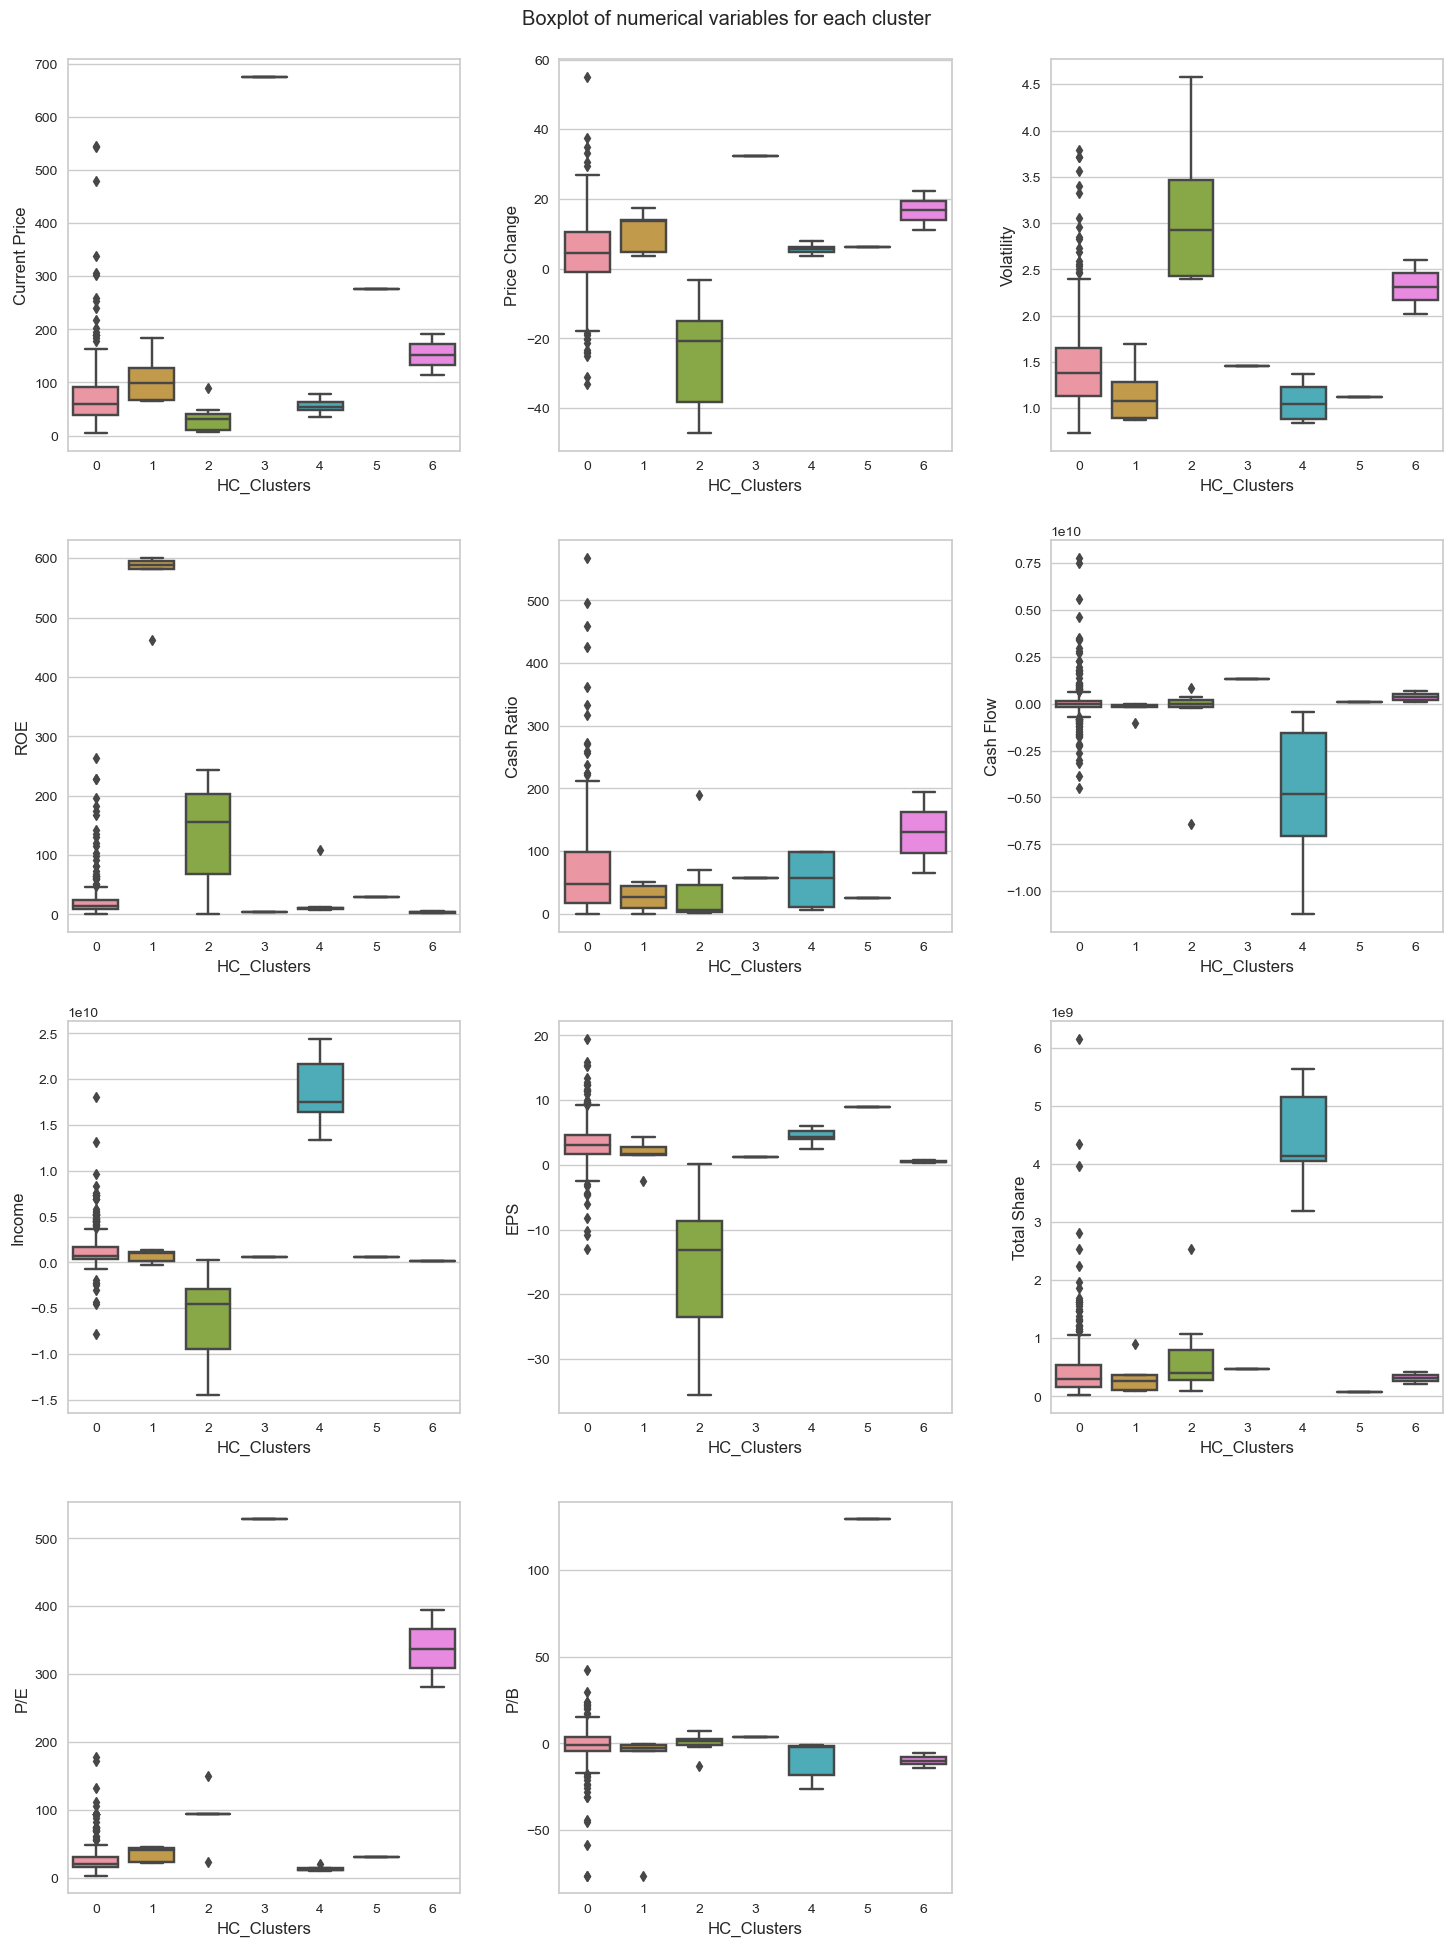

In [76]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df3, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [77]:
# let's see the names of the securities in cluster 1-6

for i in [1,2,3,4, 5,6]:
    print("In cluster {}, the following securities are present:".format(i))
    print(df3[df3["HC_Clusters"] == i]["Security"].unique())
    print()

In cluster 1, the following securities are present:
['Allegion' 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark'
 'S&P Global, Inc.']

In cluster 2, the following securities are present:
['Anadarko Petroleum Corp' 'Devon Energy Corp.'
 'Freeport-McMoran Cp & Gld' 'Kinder Morgan' 'Newfield Exploration Co'
 'Southwestern Energy' 'Cimarex Energy']

In cluster 3, the following securities are present:
['Amazon.com Inc']

In cluster 4, the following securities are present:
['Citigroup Inc.' 'JPMorgan Chase & Co.' 'AT&T Inc'
 'Verizon Communications' 'Wells Fargo' 'Exxon Mobil Corp.']

In cluster 5, the following securities are present:
['Alliance Data Systems']

In cluster 6, the following securities are present:
['Alexion Pharmaceuticals' 'Netflix Inc.']



- Because basically everything is in Cluster 0 there really are not very many insights we can gain from this model.
- Amazon is now in a cluster all on it's own as is Alliance Data Systems.

### Hierarchical using Ward Linkage

Just out of curiousity, I want to analyze the Hierarchical Clustering using the war linkage. Even though it's silhouette score was low, the dendrogram gave more interesting clusters. I just want to take a look. The rows removed in the previous example are back in.

In [78]:
dfw = df.copy()

In [79]:
# Ward Linkages

HCmodel_Ward = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
HCmodel_Ward.fit(subset_sc_df)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [80]:
subset_sc_df["HC_Clusters"] = HCmodel_Ward.labels_
dfw["HC_Clusters"] = HCmodel_Ward.labels_

In [81]:
dfw.head()

Symbol                 Security                  Sector  \
0    AAL  American Airlines Group             Industrials   
1   ABBV                   AbbVie             Health Care   
2    ABT      Abbott Laboratories             Health Care   
3   ADBE        Adobe Systems Inc  Information Technology   
4    ADI     Analog Devices, Inc.  Information Technology   

                 Sub Ind  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Cash Flow      Income    EPS   Total Share         P/E  \
0          51 -604000000  7610000000  11.39  6.681299e+08    3.718174   
1          77   51000000  5144000000   3.15  1.633016e+09   18.806350   
2          67  938000000  4423000000   2.94  1.504422e+09   15.275510   
3         180 -240840000   629551000   1.26  4.996437e+08   74.555557   
4         272  315120000   696878000   0.31  2.247994e+09  178.451613   

        P/B  HC_Clusters  
0 -8.784219            3  
1 -8.750068            3  
2 -0.394171            3  
3  4.199651            0  
4  1.059810            3

Cluster Profiling
- Group data based on the clusters formed
- Check summary statistics of the variables for each group
- Visualize variable distributions for each group
- Insights

In [82]:
cluster_profile = dfw.groupby("HC_Clusters").mean(numeric_only=True)

In [83]:
cluster_profile['count_in_each_segment'] = (dfw.groupby("HC_Clusters")["Symbol"].count().values)

In [84]:
cluster_profile.style.highlight_max(color='lightgreen', axis=0)

- Cluster 0 has the highest average Current Price of $213.52.
- Cluster 0 has the highest average percent price change with 15.25% increase.
- Cluster 0 also has the highest Cash Ratio, Cash Flow, EPS, and P/B Ratio. All signs of good investments.
- Cluster 0 also has middle-of-the-road volatility.
- Cluster 3 is the most represented cluster.

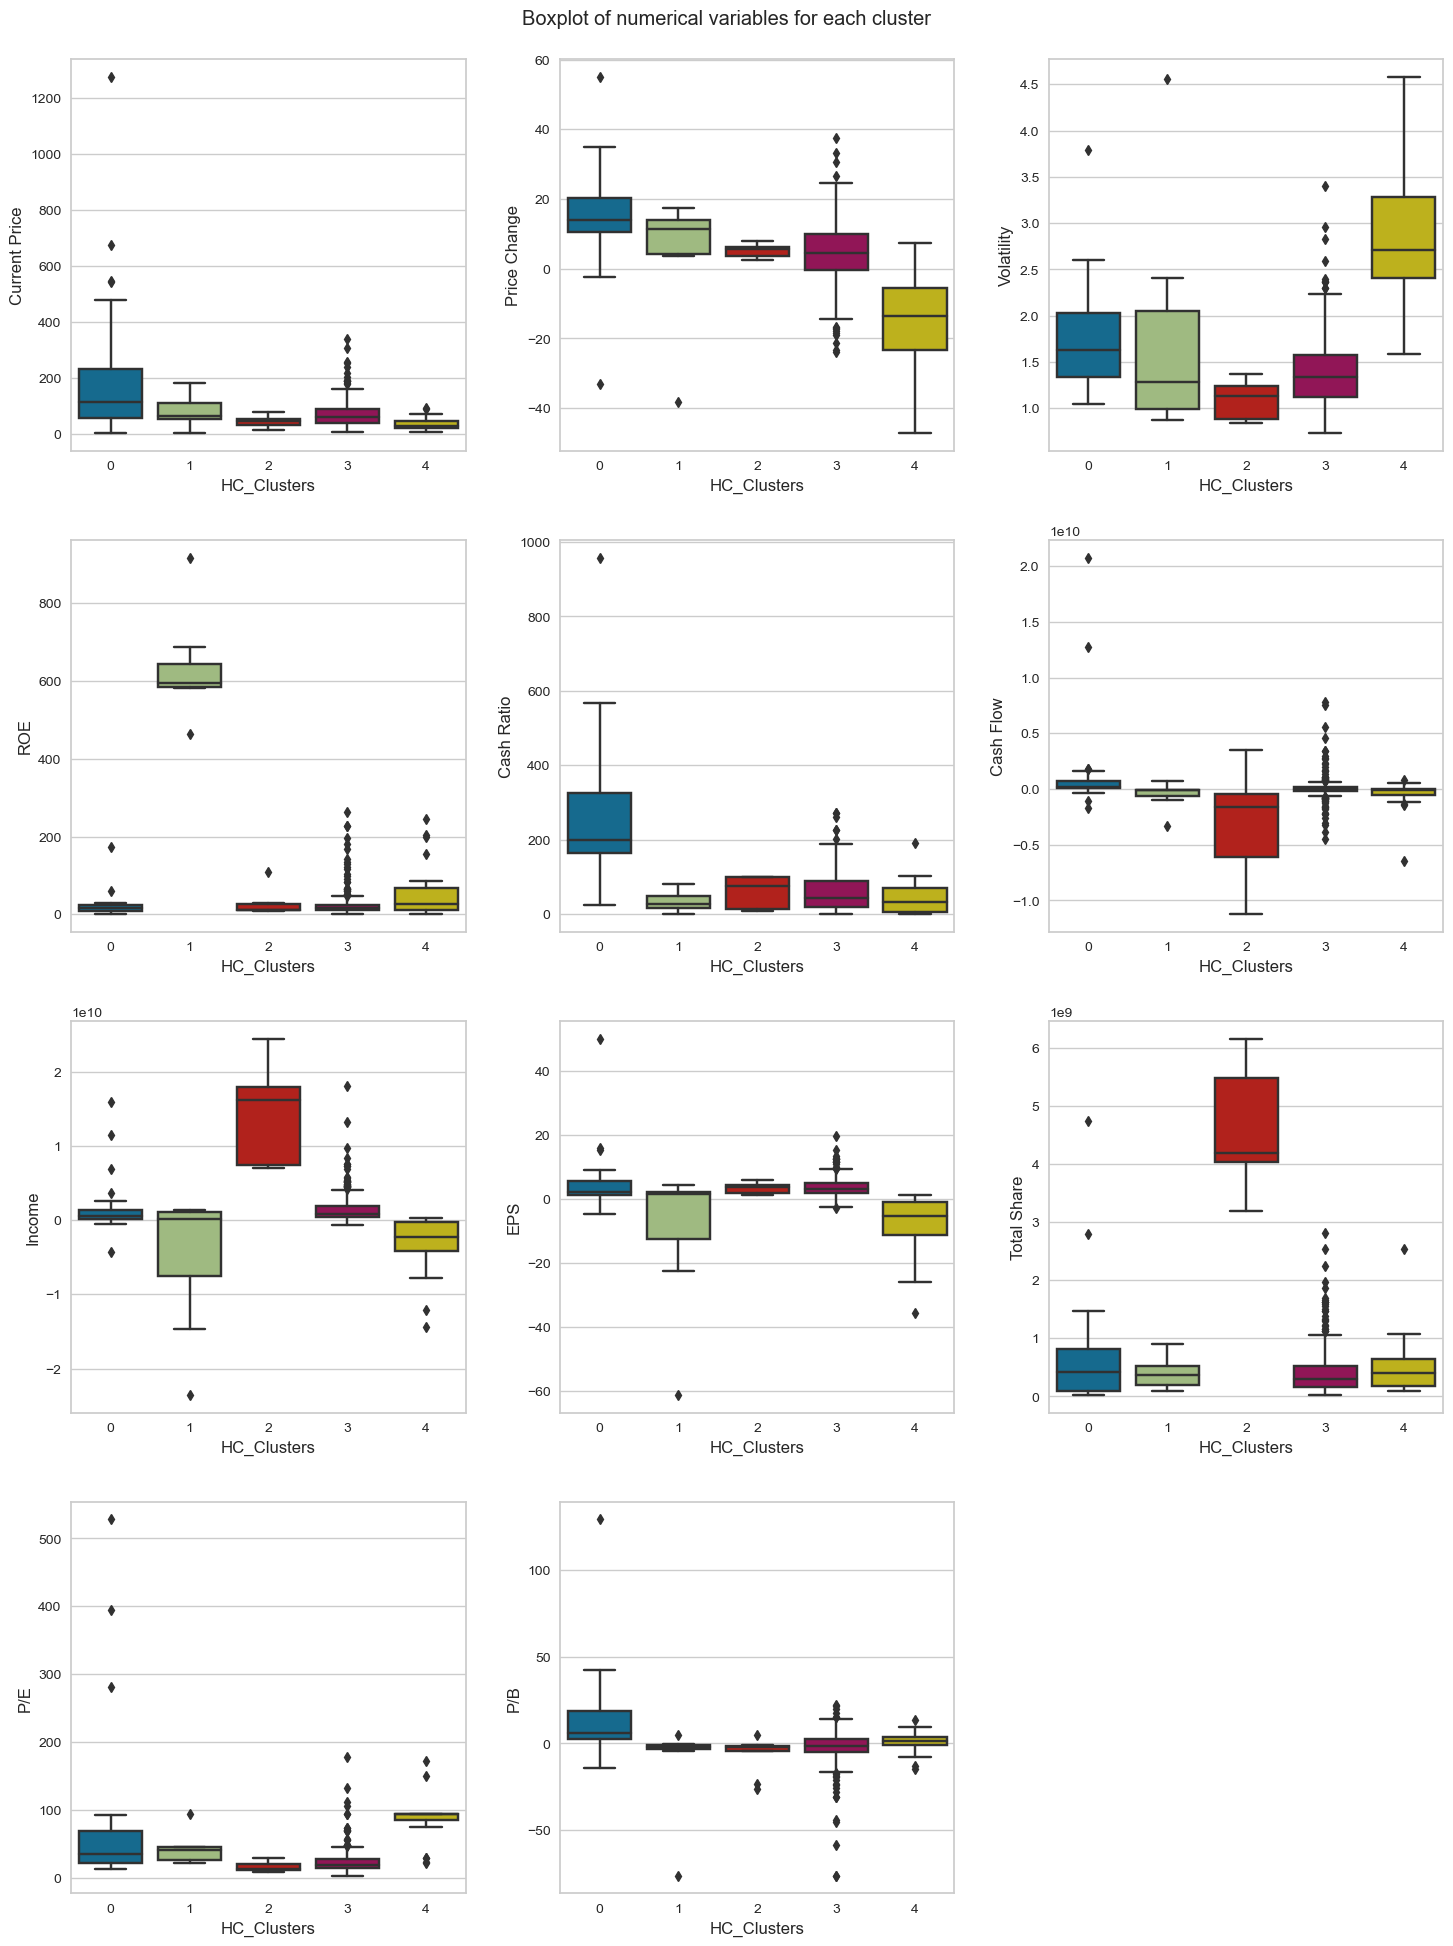

In [85]:
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=dfw, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [86]:
# let's see the names of the securities in all but cluster 3.

for i in [0,1,2,4]:
    print("In cluster {}, the following securities are present:".format(i))
    print(dfw[dfw["HC_Clusters"] == i]["Security"].unique())
    print()

In cluster 0, the following securities are present:
['Adobe Systems Inc' 'Alliance Data Systems' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'Amgen Inc' 'Amazon.com Inc' 'Broadcom'
 'Bank of America Corp' 'Celgene Corp.' 'Chipotle Mexican Grill' 'Equinix'
 'Edwards Lifesciences' 'Facebook' 'First Solar Inc'
 'Frontier Communications' 'Intel Corp.' 'Intuitive Surgical Inc.'
 'Monster Beverage' 'Newmont Mining Corp. (Hldg. Co.)' 'Netflix Inc.'
 'Priceline.com Inc' 'Regeneron' 'TripAdvisor'
 'Vertex Pharmaceuticals Inc' 'Waters Corporation' 'Wynn Resorts Ltd'
 'Yahoo Inc.']

In cluster 1, the following securities are present:
['Allegion' 'Apache Corporation' 'Chesapeake Energy'
 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark'
 'S&P Global, Inc.']

In cluster 2, the following securities are present:
['Citigroup Inc.' 'Ford Motor' 'JPMorgan Chase & Co.' 'Coca Cola Company'
 'Pfizer Inc.' 'AT&T Inc' 'Verizon Communications' 'Wells Fargo'
 'Exxon Mobil Corp.']

In cluster

<Axes: xlabel='HC_Clusters'>

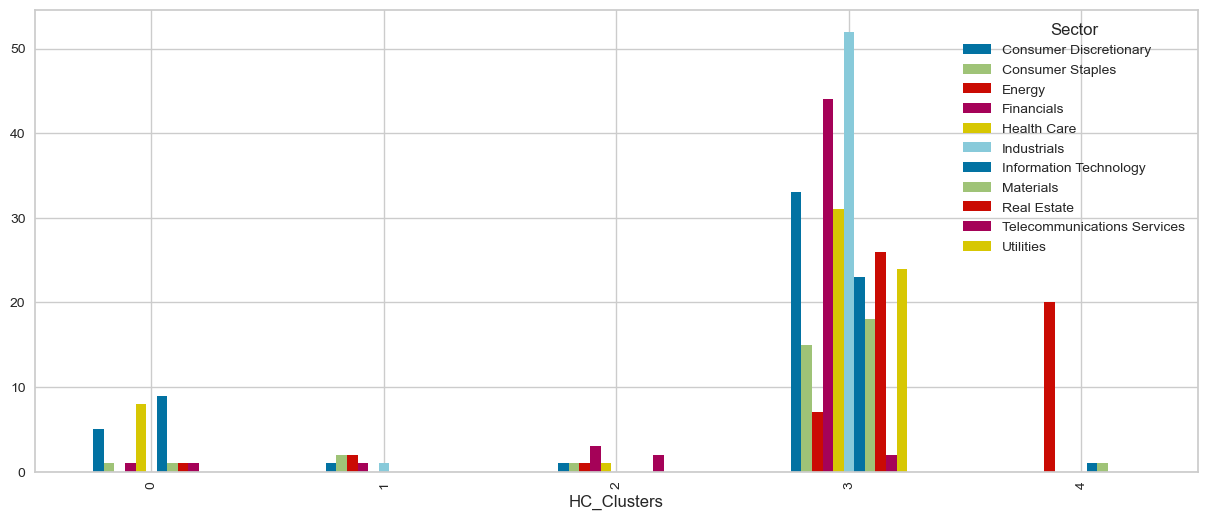

In [87]:
dfw.groupby("HC_Clusters")["Sector"].value_counts().unstack().plot.bar(figsize=(15, 6))

- Industrials are almost entiely in cluster 3
- Cluster 4 is dominated by Energy
- Almost all Financials are in cluster 3
- Materials are almost all in Cluster 3
- Real Estate is almost all in Cluster 3
- Utilities are all in Cluster 3
- These cluster are very similar to the K-means Clusters despite there being an extra cluster.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

##### Which clustering technique took less time for execution?

Honestly for me, all clustering methods were roughly equal in time to execute.

##### Which clustering technique gave you more distinct clusters, or are they the same?

Both hierarchical models gave 5 clusters while K-means gave 4. However, the K-means clusters and the HC Clusters using the Ward linkages were very similar in their makeup despite having a different number of clusters.

##### How do the silhouette scores vary?

- K-means Silhouette Score: 45.4%
- HC using Average Linkage Silhouette Score: 94%
- HC using Ward Linkage Silhouette Score: 71%

##### How many observations are there in the similar clusters of both algorithms?

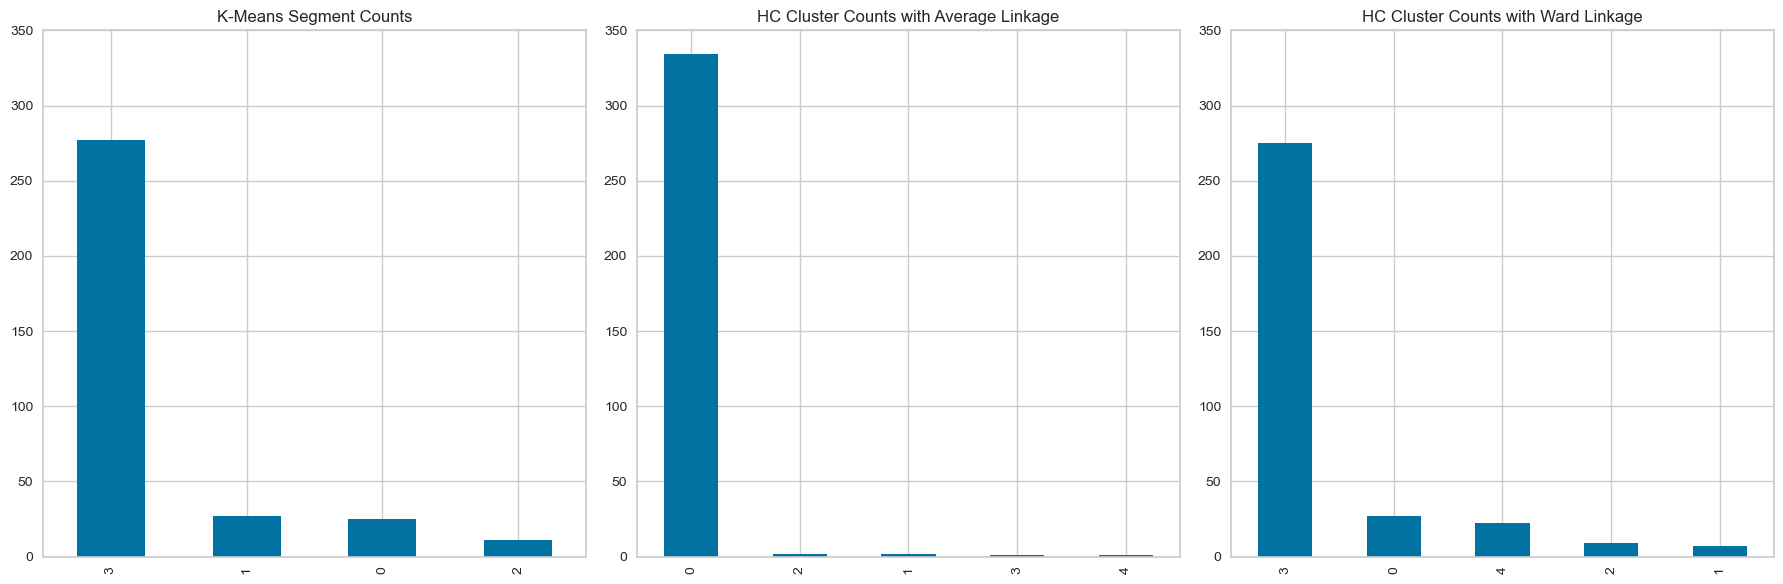

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

df1['K-means Segments'].value_counts().plot.bar(ax=axes[0])
df2['HC_Clusters'].value_counts().plot.bar(ax=axes[1])
dfw['HC_Clusters'].value_counts().plot.bar(ax=axes[2])

axes[0].set_title("K-Means Segment Counts")
axes[1].set_title("HC Cluster Counts with Average Linkage")
axes[2].set_title("HC Cluster Counts with Ward Linkage")

axes[0].set_ylim(0,350)
axes[1].set_ylim(0,350)
axes[2].set_ylim(0,350)

plt.tight_layout()
plt.show()

##### How many clusters are obtained as the appropriate number of clusters from both algorithms?

For each model the number of clusters was:
- K-Means: 4
- HC with AL: 5
- HC with W: 5

##### differences or similarities you obtained in the cluster profiles from both the clustering techniques

- I was not able to make any meaningful insights from the HC model with averages linkages because almost every security was put into one cluster.
- K-Means and HC with Ward were so similar almost all of the insights were the same.

## Actionable Insights and Recommendations

I would use the Hierarchical Clustering model using the Ward linkage to make my actionable insights since this model had the highest silhouette score and the most useful clusters.

- If I were to invest in stock in one particular cluster I would choose Cluster 0. 
- Cluster 0 has the highest values in several good indicators such as Price Change, Cash Ratio, Cash Flow, Earnings Per Share, and P/B Ratio. 
- It also has middle-of-the-road volatility indicating safe and predictable investments.
- It has moderately high P/E Ratios indicating that shares are not overpriced for their value. 
- Cluster 0 has decent portfolio diversity covering 8 industries although not a whole lot of individual securities like cluster 3. 